## 1. Preparación de datos

En primer lugar se procede a importar los datos y conocer que columnas hay en el csv

In [4]:
#  Librerías 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt 
import math 
import matplotlib.ticker as mtick # For specifying the axes tick format  
from sklearn.metrics import roc_curve , auc 
from sklearn.metrics import confusion_matrix, classification_report

# =============================================================================
# PCA
# =============================================================================
# Cargar dataset

pd.set_option('display.max_rows', None)

original_df = pd.read_csv('Wine.csv')

# Delete Customer_Segment
df = original_df.drop(['Customer_Segment'], axis=1)

# df
# Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
# Alcohol,Ácido málico,Cenizas,Alcántanos de cenizas,Magnesio,Fenoles totales,Flavonoides,Fenoles no flavonoides,Proantocianinas,Intensidad_de_color,Tono,OD280,Prolina

# Explicación de las columnas no entendidas
# 0D280 => El término OD280 se refiere a la absorbancia óptica a 280 nm, una medida utilizada en la enología para evaluar la cantidad de compuestos fenólicos en el vino. 
# Estos compuestos son importantes porque influyen en el color, sabor y estabilidad del vino.El término OD280 se refiere a la absorbancia a 280 nm (nanómetros) en espectrofotometría, una técnica utilizada para medir la cantidad de luz absorbida por una muestra. En el contexto del vino, OD280 se utiliza para evaluar la cantidad de compuestos fenólicos, especialmente proteínas y polifenoles, que están presentes en el vino.
#  Una alta absorbancia a 280 nm generalmente indica una mayor concentración de estos compuestos, lo que puede ser un indicador de la calidad del vino1.
# All are numeric values, they are not normalized





## 2. EDA

Antes de plantearse construir cualquier modelo conviene estudiar e investigar los datos para comprenderlos mejor, ver en qué se caracterizan y con ello poder hacerse preguntas sobre los mismos que puedan responderse con el uso de distintos modelos de ML.

### 2.1. EDA (univariante)

En el primer apartado del EDA analizarmemos las variables de manera aislada, lo que se conoce como análisis univariante.
Observamos que todas las variables son continuas.
Este primer análisis lo centraremos en visualizaciones de la distribución de las variables histogramas para ver cómo evolucionan las variables numéricas.

#### 2.1.1. Todas las variables son numericas continuas


- Alcohol: El contenido de alcohol en el vino afecta su cuerpo y sabor. Los vinos con mayor contenido de alcohol suelen ser más robustos y cálidos en boca.
- Ácido málico: Es uno de los ácidos principales en el vino, contribuyendo a su frescura y acidez. Durante la fermentación maloláctica, el ácido málico se convierte en ácido láctico, suavizando el vino.
- Cenizas: Representan los minerales presentes en el vino. Un mayor contenido de cenizas puede indicar un vino más complejo y estructurado.
- Alcántanos de cenizas: Se refiere a la alcalinidad de las cenizas, que puede influir en el equilibrio y la estabilidad del vino.
- Magnesio: Es un mineral que puede afectar la fermentación y el sabor del vino. Niveles adecuados de magnesio son importantes para la salud de las levaduras durante la fermentación.
- Fenoles totales: Incluyen todos los compuestos fenólicos en el vino, que contribuyen a su color, sabor y capacidad de envejecimiento.
- Flavonoides: Son un tipo de fenoles que aportan color y antioxidantes al vino. Son importantes para la estructura y el envejecimiento del vino.
- Fenoles no flavonoides: Incluyen compuestos como los ácidos fenólicos, que también influyen en el sabor y la estabilidad del vino.
- Proantocianinas: Son compuestos fenólicos que contribuyen al color y astringencia del vino, especialmente en los tintos.
- Intensidad de color: Mide la profundidad del color del vino, que puede indicar su concentración y potencial de envejecimiento.
- Tono: Se refiere al matiz del color del vino. Por ejemplo, un vino tinto puede tener tonos púrpuras, rubí o marrones, dependiendo de su edad y variedad de uva.
- OD280: Es una medida de la absorbancia a 280 nm, utilizada para estimar la cantidad de compuestos fenólicos en el vino.
- Prolina: Es un aminoácido presente en el vino, que puede influir en su sabor y estabilidad.

In [5]:
# Información relevante sobre las columnas
df.info()
# Estadísticas descriptivas para todas las columnas
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB
          Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  

#### 2.1.2. Deteccion de ANOMALIAS 

#### 2.1.2.a. Deteccion de ANOMALIAS con BLOXPOT
Otro de los análisis univariantes que se pueden aplicar para las variables numéricas es la detección de anomalías mediante un boxplot. Vamos a utilizar un boxplot por ser una técnica "No paramétrica" (es decir, que no asume nada sobre la distribución de los datos de la variable; puede ser de cualquier forma).

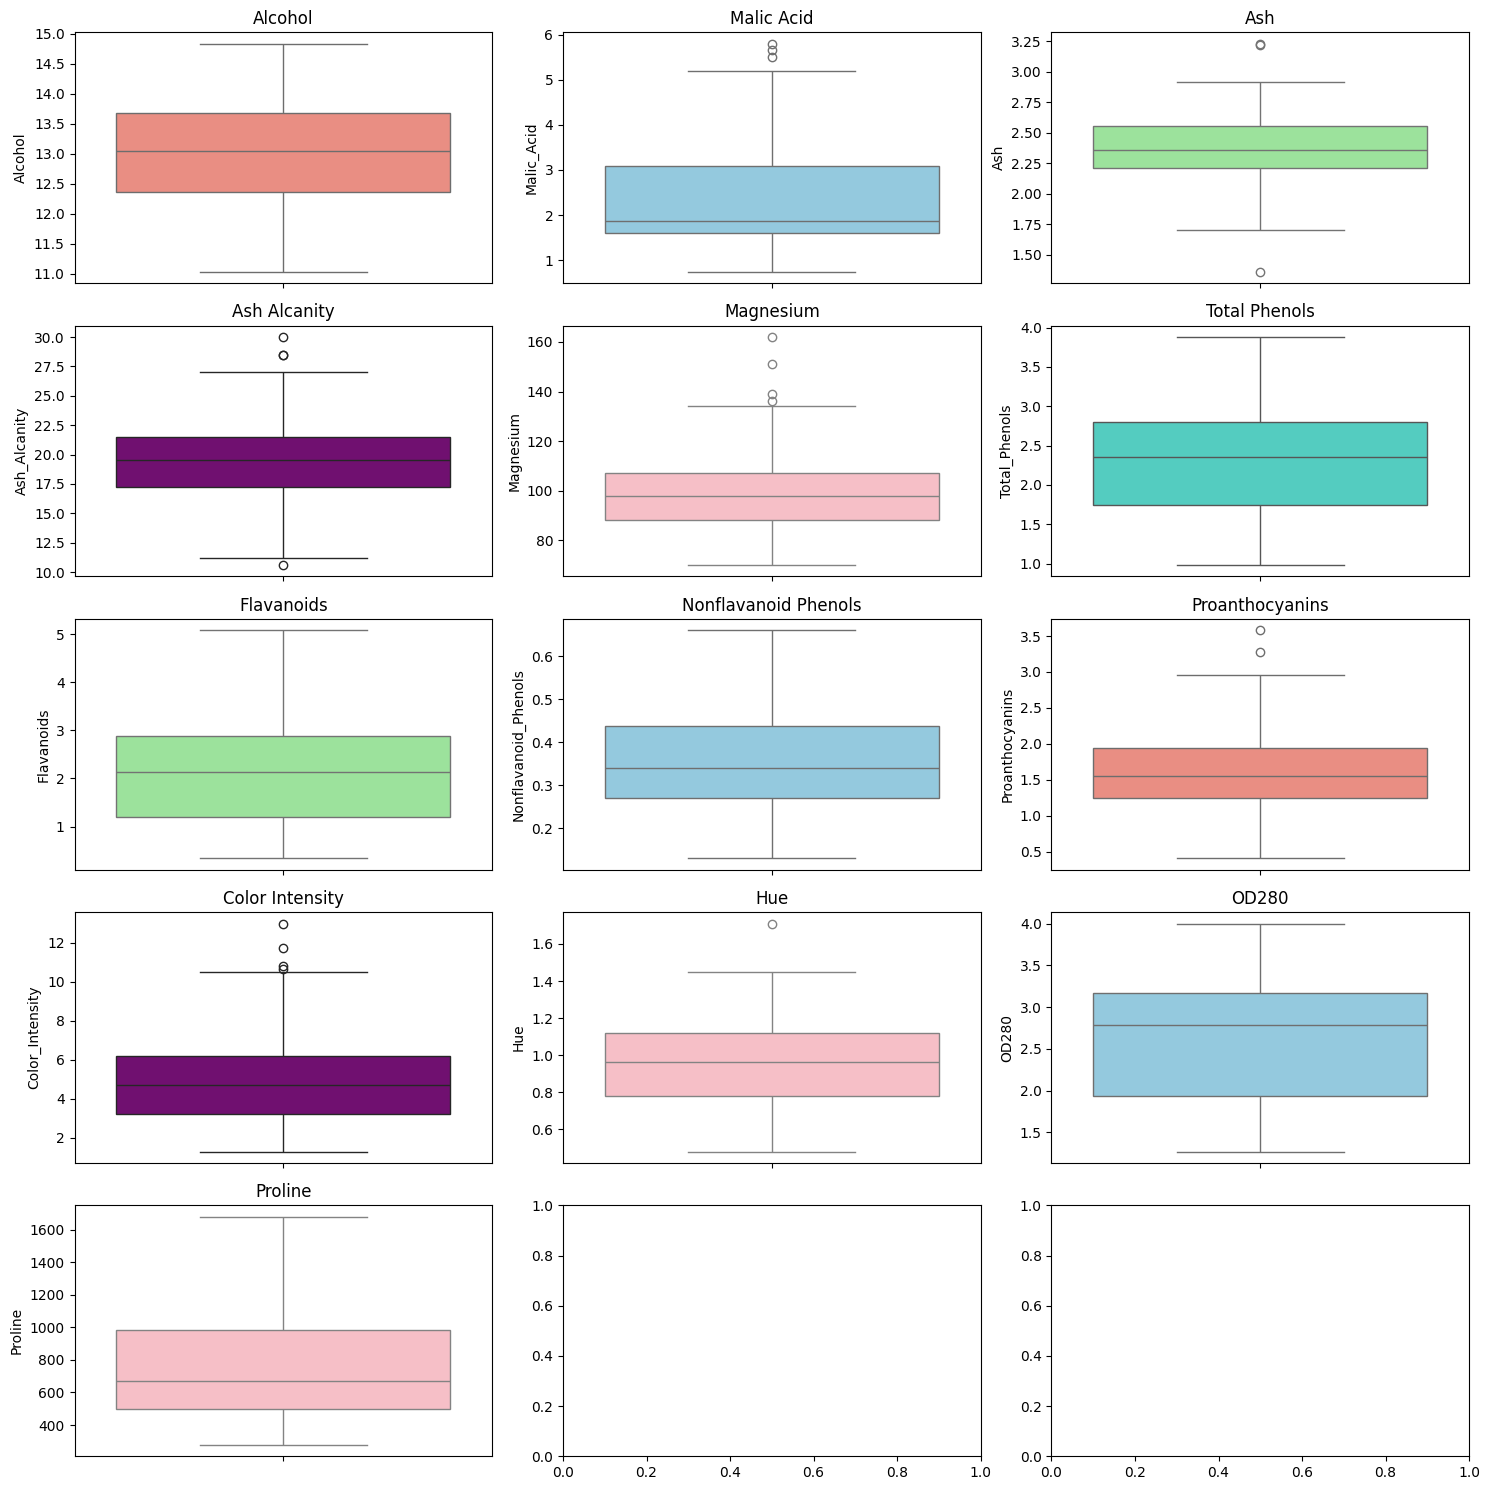

In [6]:

# Visualizar la distribución de las variables:
# - Boxplot
f, axes = plt.subplots(5, 3, figsize=(15, 15))

# Alcohol
sns.boxplot(y="Alcohol", data=df, ax=axes[0][0], color="salmon")
axes[0][0].set_title('Alcohol')

# Malic Acid
sns.boxplot(y="Malic_Acid", data=df, ax=axes[0][1], color="skyblue")
axes[0][1].set_title('Malic Acid')

# Ash
sns.boxplot(y="Ash", data=df, ax=axes[0][2], color="lightgreen")
axes[0][2].set_title('Ash')

# Ash Alcanity
sns.boxplot(y="Ash_Alcanity", data=df, ax=axes[1][0], color="purple")
axes[1][0].set_title('Ash Alcanity')

# Magnesium
sns.boxplot(y="Magnesium", data=df, ax=axes[1][1], color="lightpink")
axes[1][1].set_title('Magnesium')

# Total Phenols
sns.boxplot(y="Total_Phenols", data=df, ax=axes[1][2], color="turquoise")
axes[1][2].set_title('Total Phenols')

# Flavanoids
sns.boxplot(y="Flavanoids", data=df, ax=axes[2][0], color="lightgreen")
axes[2][0].set_title('Flavanoids')

# Nonflavanoid Phenols
sns.boxplot(y="Nonflavanoid_Phenols", data=df, ax=axes[2][1], color="skyblue")
axes[2][1].set_title('Nonflavanoid Phenols')

# Proanthocyanins
sns.boxplot(y="Proanthocyanins", data=df, ax=axes[2][2], color="salmon")
axes[2][2].set_title('Proanthocyanins')

# Color Intensity
sns.boxplot(y="Color_Intensity", data=df, ax=axes[3][0], color="purple")
axes[3][0].set_title('Color Intensity')

# Hue
sns.boxplot(y="Hue", data=df, ax=axes[3][1], color="lightpink")
axes[3][1].set_title('Hue')

# OD280
sns.boxplot(y="OD280", data=df, ax=axes[3][2], color="skyblue")
axes[3][2].set_title('OD280')

# Proline
sns.boxplot(y="Proline", data=df, ax=axes[4][0], color="lightpink")
axes[4][0].set_title('Proline')

plt.tight_layout()
plt.show()


En este primer caso se estudian la existencia de valores atípicos dentro de los datos en relación a ellos mismos, es decir, qué valores atípicos hay dentro de cada conjunto de datos por separado.

La detección de anomalías sirve para dos cosas. En primer lugar, a modo informativo, nos permite ver los límites dentro de los cuales se mueve la mayoría de los datos, y así tener más información sobre los mismos. Para este caso, vemos ciertos valores atípicos en algunos de los boxplots utilizados.
Principalmennte en
- Malic_Acid,
- Ash,
- Ash_Alcanity,
- Magenesium,
- Proanthocyanins,
- Color_Intensity,
- Hue

En segundo lugar, la detección de anomalías nos sirve para identificar puntos que podrían perjudicar la capacidad de generalización del modelo y empeorar sus métricas, por ser bien muy poco representativos, o bien por ser incluso datos que podrían ser incorrectos. Para este caso, el tratamiento de anomalías puede pasar desde dejarlas como están aun teniendo presente su existencia, hasta eliminarlas (si son datos atípicos no relevantes) o imputarlas un valor arbitrario (como la media) para que no afecten al sistema en exceso. 

#### 2.1.2.b. Deteccion de ANOMALIAS con TABLA


In [7]:

# Identificar los datos anómalos en cada columna
malic_acid_anomalies = df.sort_values(by='Malic_Acid', ascending=False).head(5)
ash_anomalies = pd.concat([df.sort_values(by='Ash', ascending=False).head(1),
                           df.sort_values(by='Ash', ascending=False).tail(1)])
ash_alcanity_anomalies = pd.concat([df.sort_values(by='Ash_Alcanity', ascending=False).head(2),
                                    df.sort_values(by='Ash_Alcanity', ascending=False).tail(1)])
magnesium_anomalies = df.sort_values(by='Magnesium', ascending=False).head(5)
proanthocyanins_anomalies = df.sort_values(by='Proanthocyanins', ascending=False).head(2)
color_intensity_anomalies = df.sort_values(by='Color_Intensity', ascending=False).head(6)
hue_anomalies = df.sort_values(by='Hue', ascending=False).head(1)

# Combinar todos los datos anómalos
all_anomalies = pd.concat([malic_acid_anomalies, ash_anomalies, ash_alcanity_anomalies,
                           magnesium_anomalies, proanthocyanins_anomalies, color_intensity_anomalies,
                           hue_anomalies]).drop_duplicates()

# Crear una función para resaltar los valores anómalos
def highlight_anomalies(val, anomalies):
    color = 'background-color: yellow' if val in anomalies else ''
    return color

# Crear un diccionario con los valores anómalos de cada columna
anomalous_values = {
    'Malic_Acid': malic_acid_anomalies['Malic_Acid'].tolist(),
    'Ash': ash_anomalies['Ash'].tolist(),
    'Ash_Alcanity': ash_alcanity_anomalies['Ash_Alcanity'].tolist(),
    'Magnesium': magnesium_anomalies['Magnesium'].tolist(),
    'Proanthocyanins': proanthocyanins_anomalies['Proanthocyanins'].tolist(),
    'Color_Intensity': color_intensity_anomalies['Color_Intensity'].tolist(),
    'Hue': hue_anomalies['Hue'].tolist()
}

# Aplicar el estilo para resaltar los valores anómalos
styled_anomalies = all_anomalies.style.map(lambda x: highlight_anomalies(x, anomalous_values['Malic_Acid']), subset=['Malic_Acid'])
styled_anomalies = styled_anomalies.map(lambda x: highlight_anomalies(x, anomalous_values['Ash']), subset=['Ash'])
styled_anomalies = styled_anomalies.map(lambda x: highlight_anomalies(x, anomalous_values['Ash_Alcanity']), subset=['Ash_Alcanity'])
styled_anomalies = styled_anomalies.map(lambda x: highlight_anomalies(x, anomalous_values['Magnesium']), subset=['Magnesium'])
styled_anomalies = styled_anomalies.map(lambda x: highlight_anomalies(x, anomalous_values['Proanthocyanins']), subset=['Proanthocyanins'])
styled_anomalies = styled_anomalies.map(lambda x: highlight_anomalies(x, anomalous_values['Color_Intensity']), subset=['Color_Intensity'])
styled_anomalies = styled_anomalies.map(lambda x: highlight_anomalies(x, anomalous_values['Hue']), subset=['Hue'])

# Mostrar las filas con datos anómalos resaltados
print("Datos anómalos comunes en las columnas especificadas:")
styled_anomalies


Datos anómalos comunes en las columnas especificadas:


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
123,13.050000,5.800000,2.130000,21.500000,86,2.620000,2.650000,0.300000,2.010000,2.600000,0.730000,3.100000,380
173,13.710000,5.650000,2.450000,20.500000,95,1.680000,0.610000,0.520000,1.060000,7.700000,0.640000,1.740000,740
137,12.530000,5.510000,2.640000,25.000000,96,1.790000,0.600000,0.630000,1.100000,5.000000,0.820000,1.690000,515
155,13.170000,5.190000,2.320000,22.000000,93,1.740000,0.630000,0.610000,1.550000,7.900000,0.600000,1.480000,725
146,13.880000,5.040000,2.230000,20.000000,80,0.980000,0.340000,0.400000,0.680000,4.900000,0.580000,1.330000,415
121,11.560000,2.050000,3.230000,28.500000,119,3.180000,5.080000,0.470000,1.870000,6.000000,0.930000,3.690000,465
59,12.370000,0.940000,1.360000,10.600000,88,1.980000,0.570000,0.280000,0.420000,1.950000,1.050000,1.820000,520
73,12.990000,1.670000,2.600000,30.000000,139,3.300000,2.890000,0.210000,1.960000,3.350000,1.310000,3.500000,985
127,11.790000,2.130000,2.780000,28.500000,92,2.130000,2.240000,0.580000,1.760000,3.000000,0.970000,2.440000,466
95,12.470000,1.520000,2.200000,19.000000,162,2.500000,2.270000,0.320000,3.280000,2.600000,1.160000,2.630000,937


Observamos que hay más de un vino que contiene más de una anomalía.

#### 2.1.3. Visualizar la distribución de las variables:


Observamos que hay varias variables que siguen una distribucion normal. Esto nos puede ayudar a comparar varias variables y a normalizar ciertos datos

- Curva de densiddad

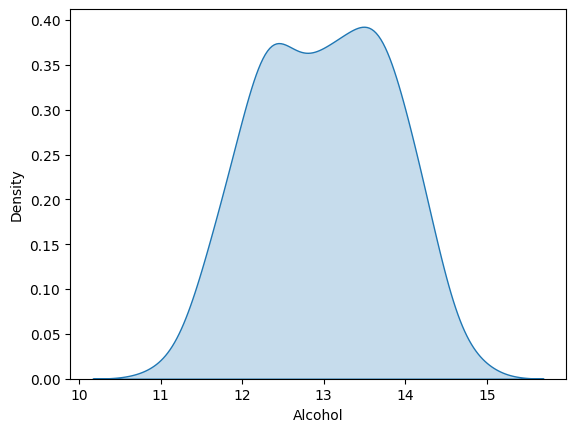

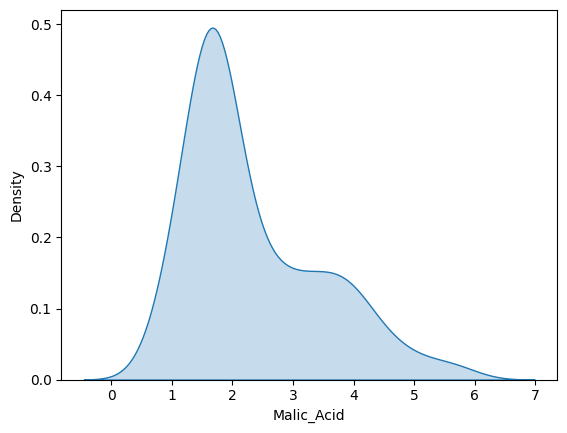

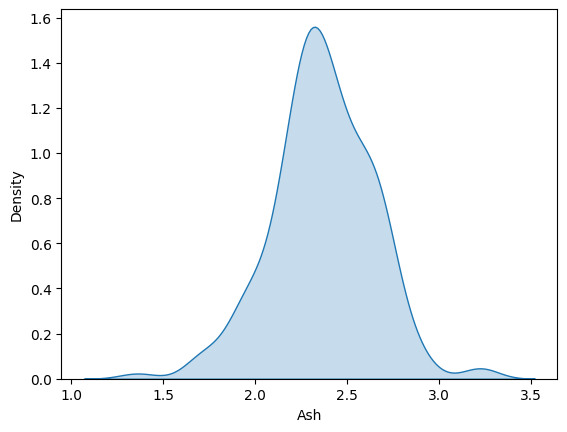

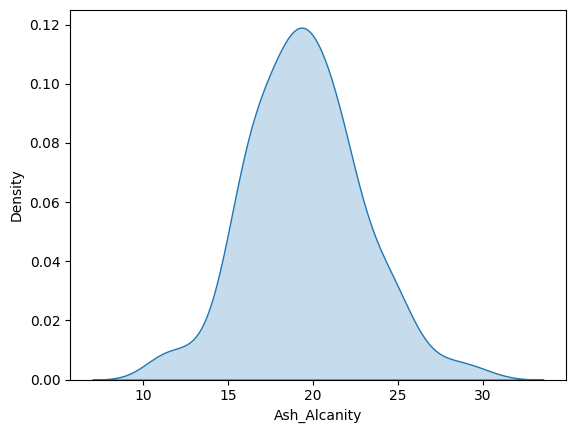

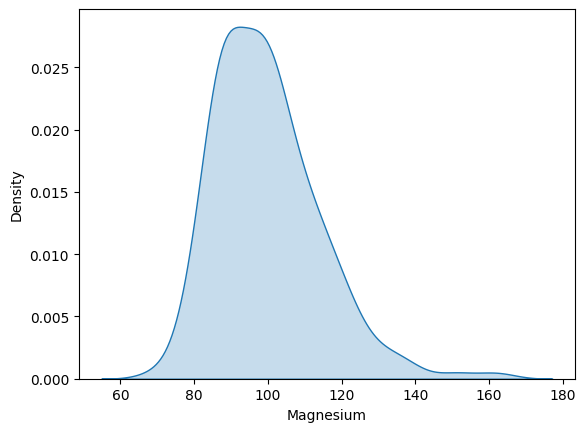

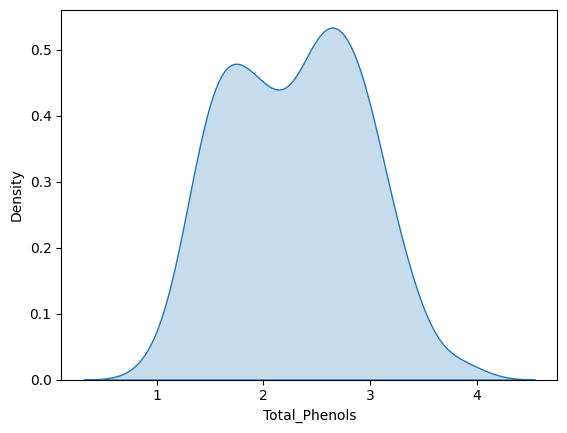

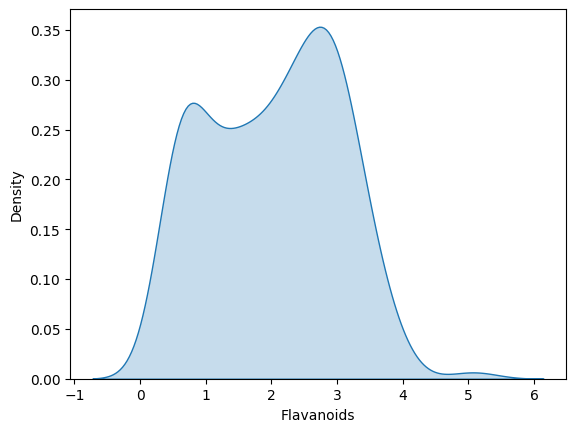

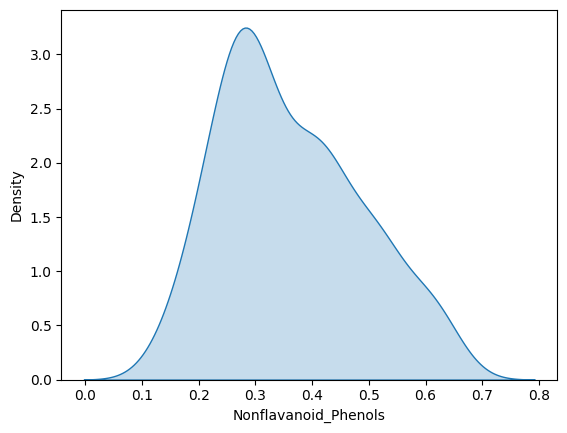

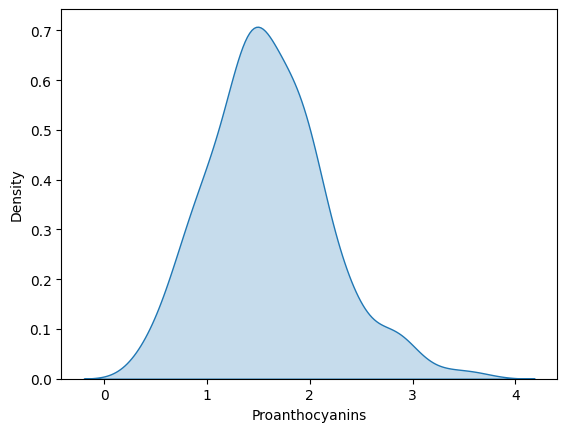

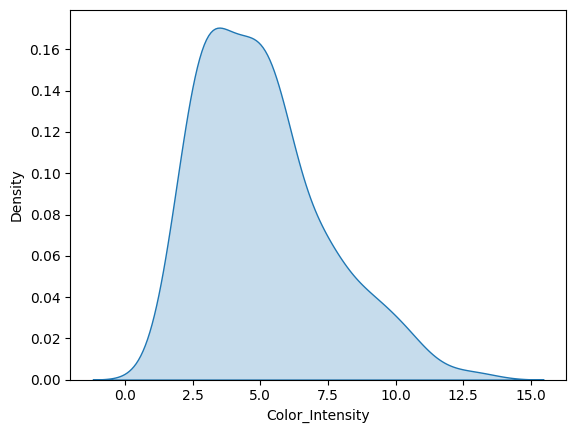

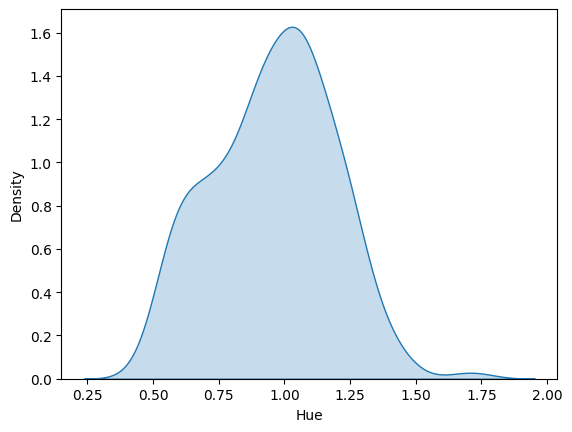

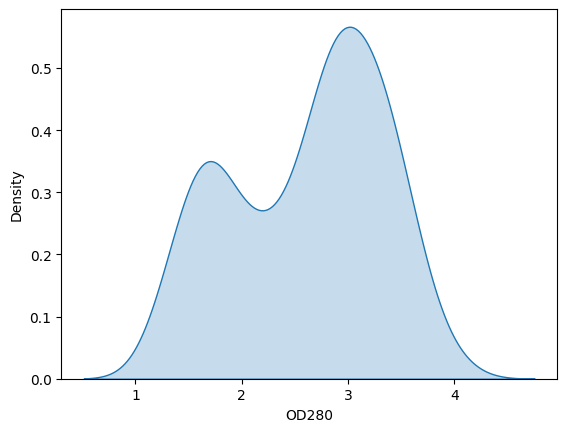

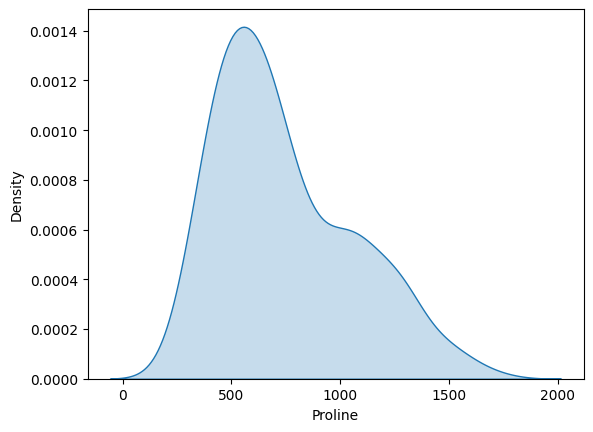

In [8]:
# Visualizar la distribución de las variables:
# - Curva de densidad:
for column in df.columns:
    sns.kdeplot(df[column], fill=True)
    plt.show()

#### 2.1.4. Detección de valores nulos

Un paso importante a tener en cuenta antes de proceder con el EDA es ver si existen valores nulos en el conjunto de datos. Estos no siempre aparecen identificados explicitamente como nulos (NAN). A veces aparecen como vacíos, con identificadores en formato string (p.e. null, missing...).

Observamos que tenemos las mismas filas en los valores del dataset y los valores del dataset sin datos nulos

In [9]:
print(len(df))
print(len(df.dropna()))

178
178


#### 2.1.5. Pre-procesado de Datos
Todas las variables son numéricas, por lo que no necesitamos pre-procesar los datos.
Más adelante se encesitará escalarlos.

## 2.2. EDA (bivariante)
En el análisis bivariante, estudiamos las relaciones entre pares de variables, de cara a obtener insights sobre la relación entre ellas.

#### 2.2.1. Histograma

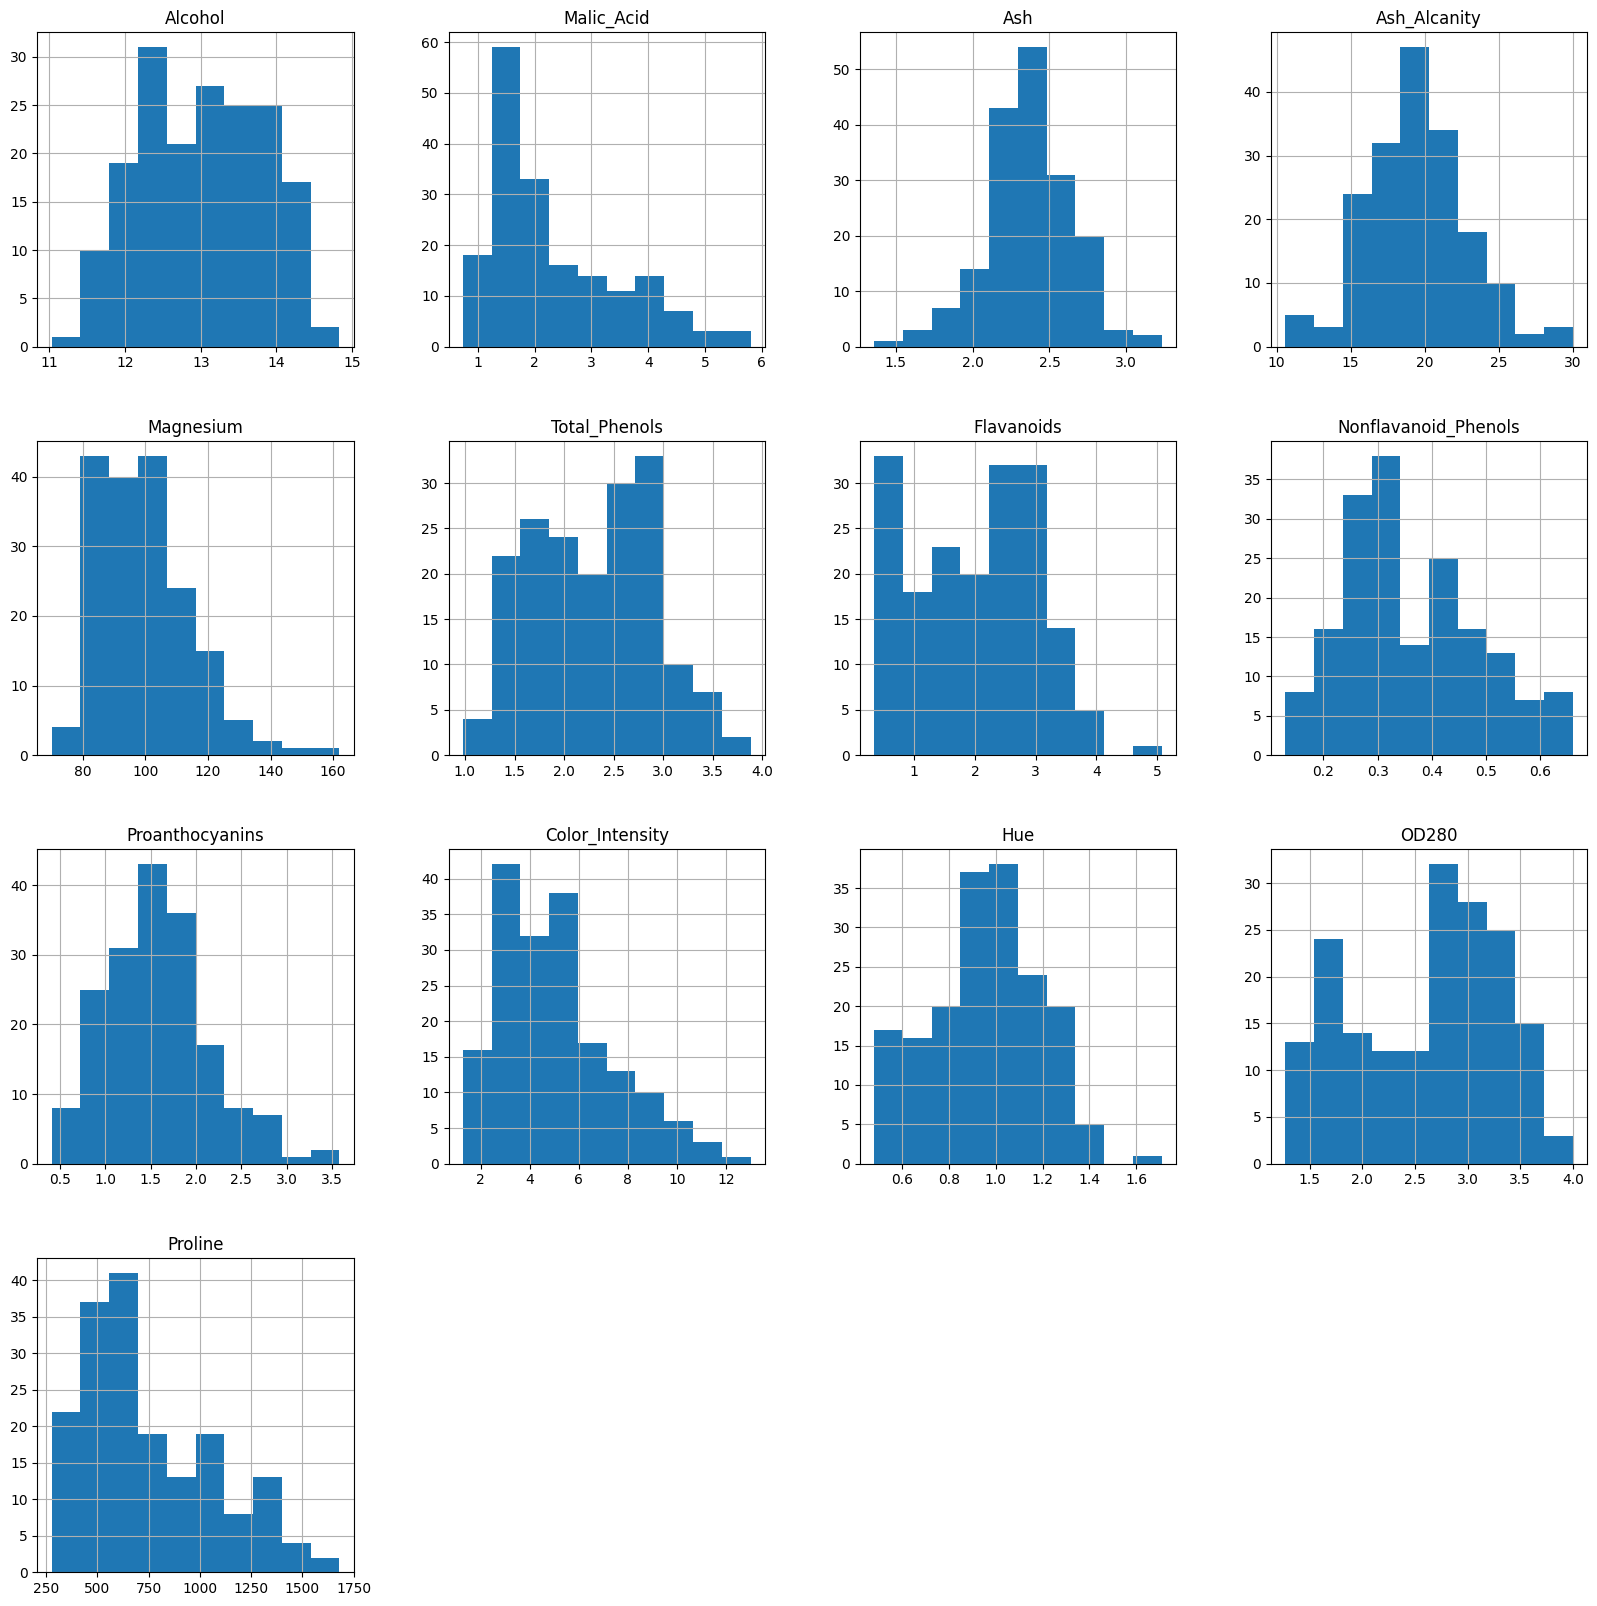

In [10]:
# Visualizar la distribución de las variables:
# - Histograma:
# sns.histplot(df[df["famrel"] == 5]['G3'],color='green', kde=True,ax=ax)
df.hist(bins=10, figsize=(20, 20), grid=True)
plt.show()

#### 2.2.3. Gráficos de dispersión

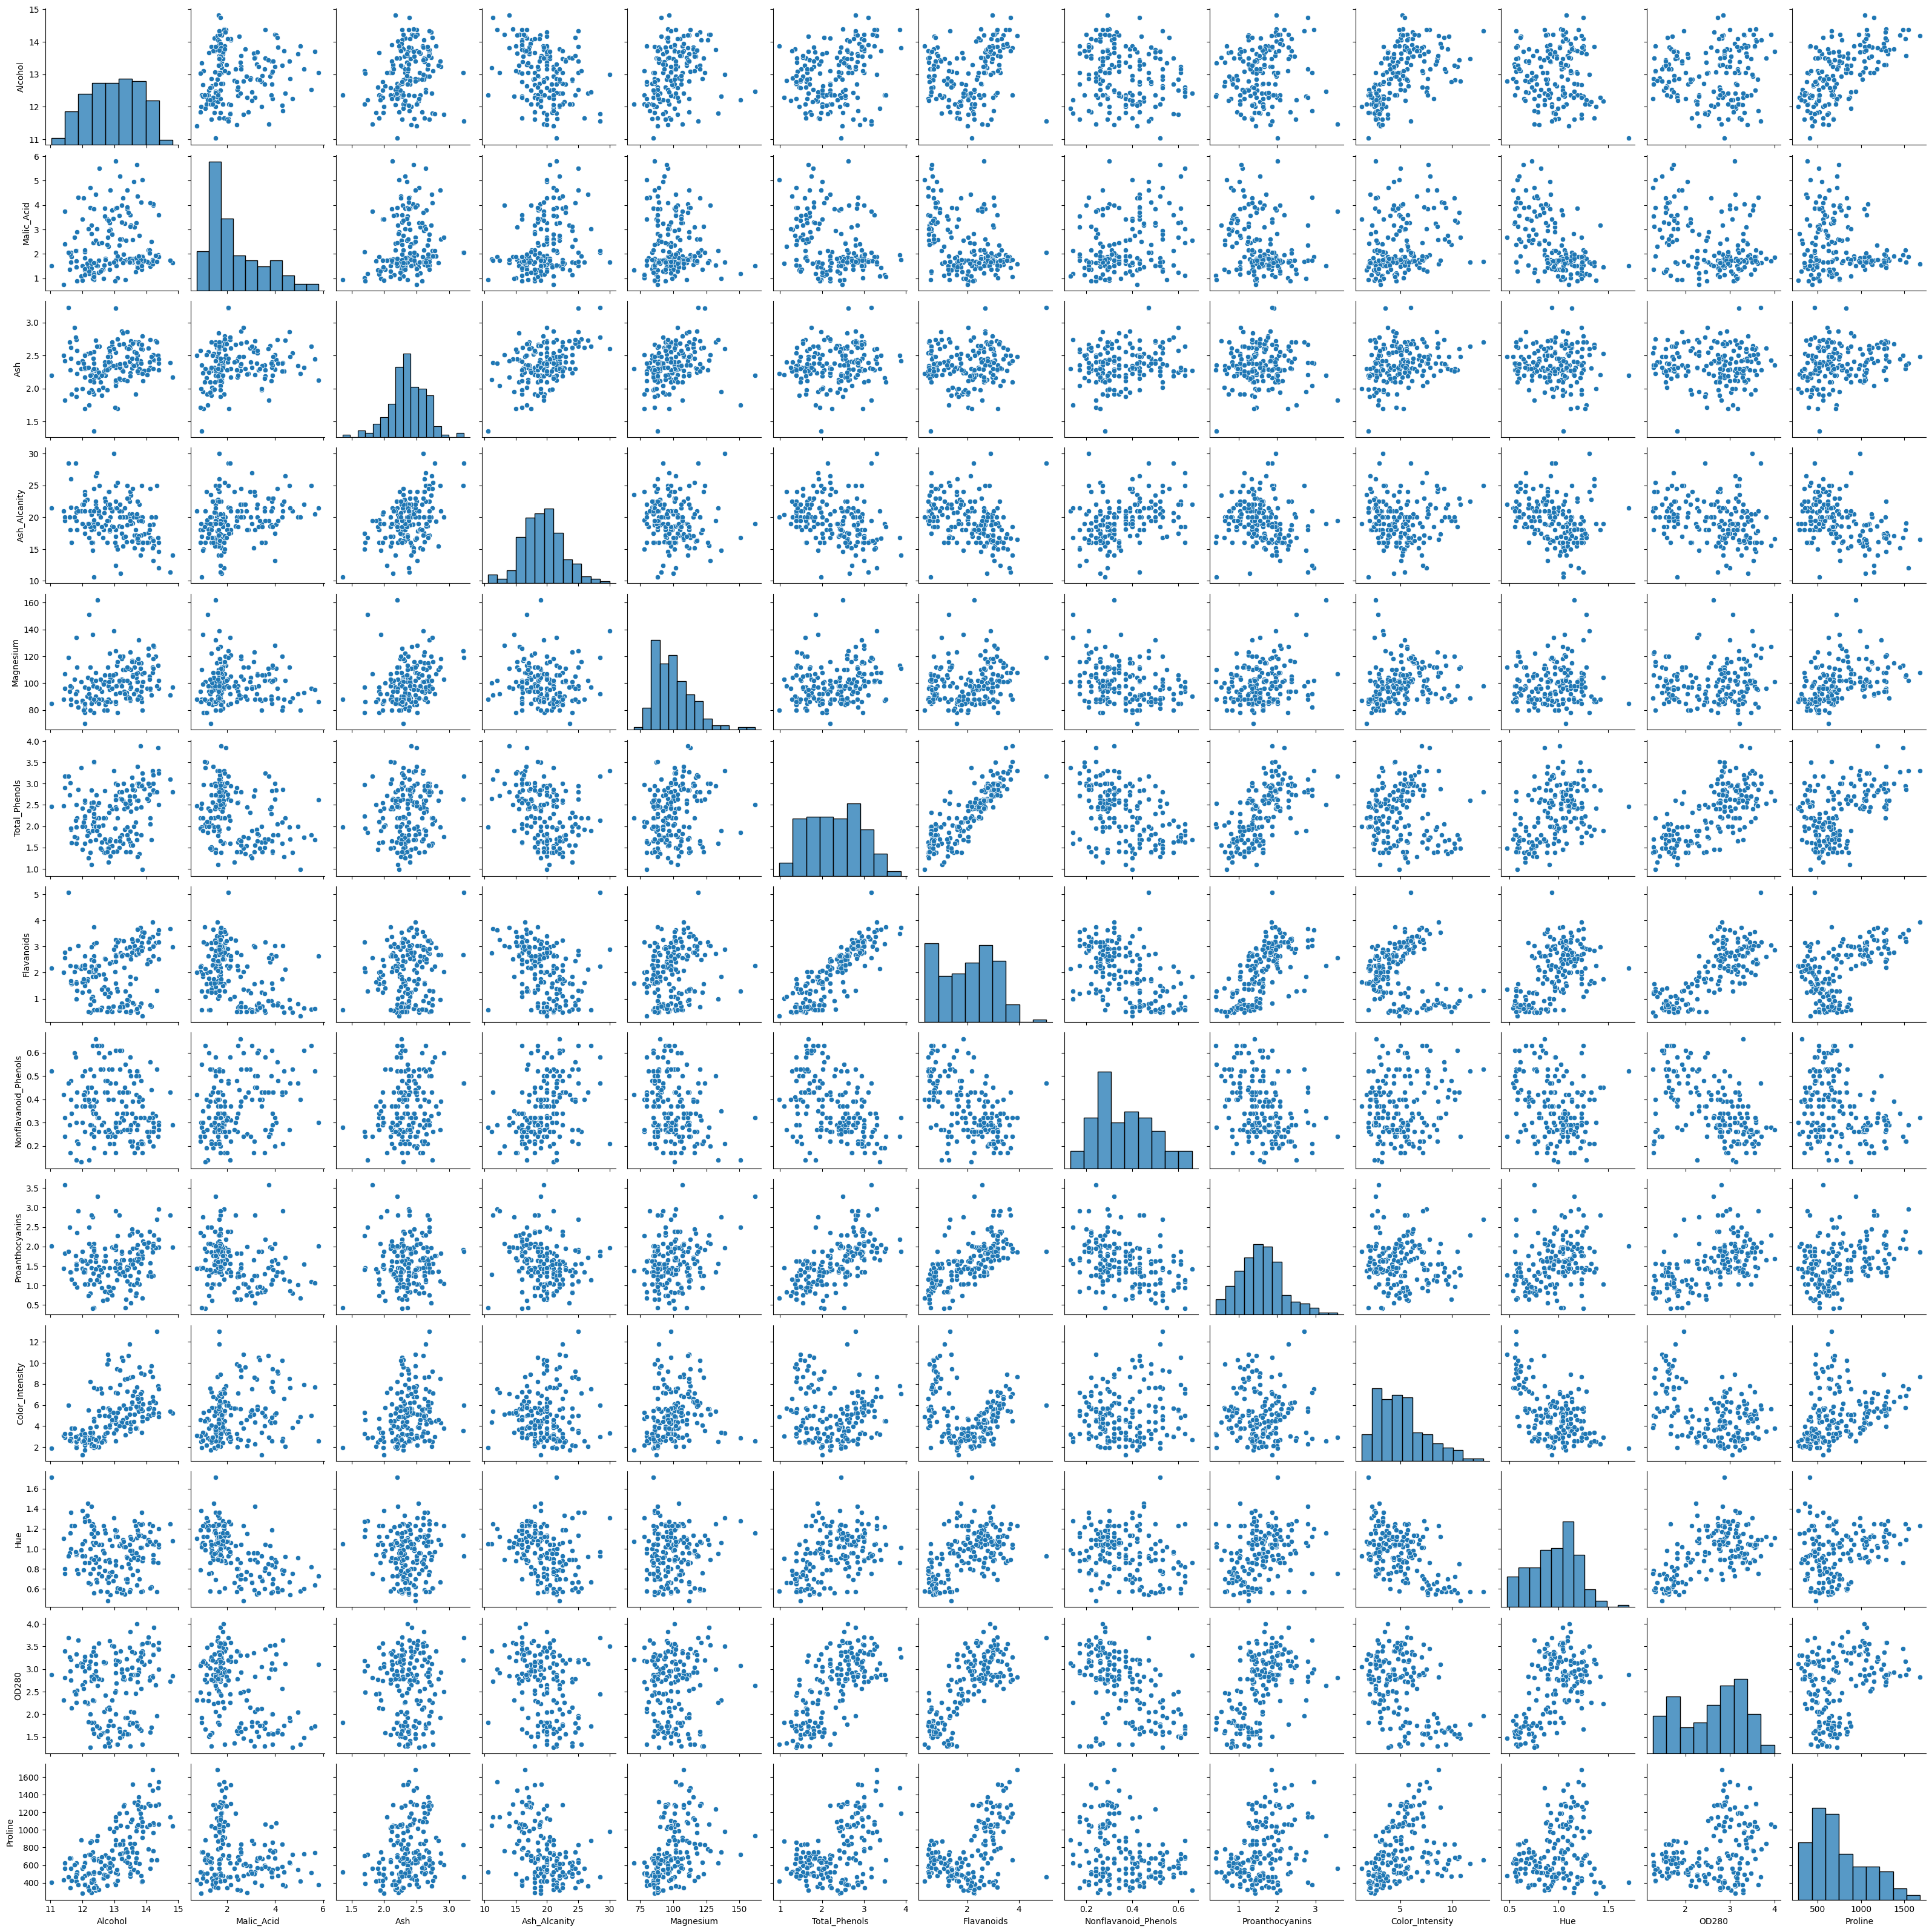

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import numpy as np

# Gráficos de dispersión
sns.pairplot(df)
plt.show()

Se aprecia como hay varias variables que tienen una correlación que tiende a tener una distribución lineal:
Total_Phenols - Flavanoids
Flavanoids - 0280

#### 2.2.4. Q-Q plot

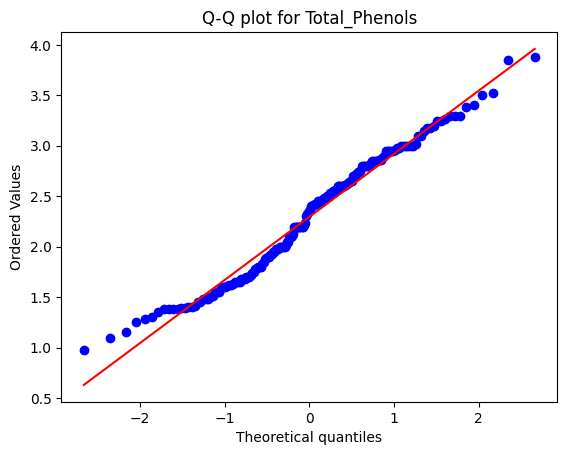

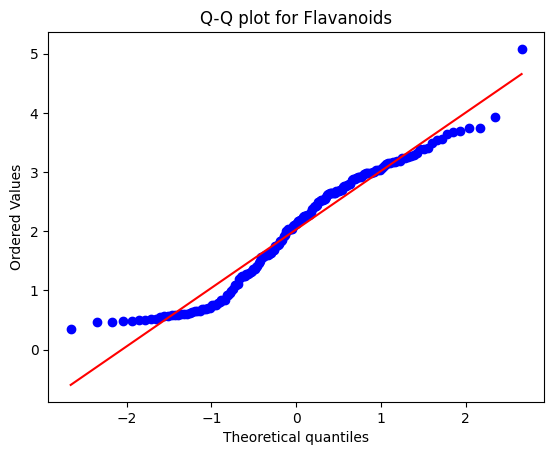

In [12]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Suponiendo que tienes dos variables altamente correlacionadas, por ejemplo, 'Total_Phenols' y 'Flavanoids'
for column in ['Total_Phenols', 'Flavanoids']:
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title(f'Q-Q plot for {column}')
    plt.show()


### 2.2.5. Estudio de Correlaciones
Uno de los primeros análisis bivariantes es el estudio de las correlaciones, que se debe aplicar sobre las variables numéricas y, en todo caso, sobre las categóricas ordinales. Se usa la correlación de Pearson ya que todas las variables son continuas.


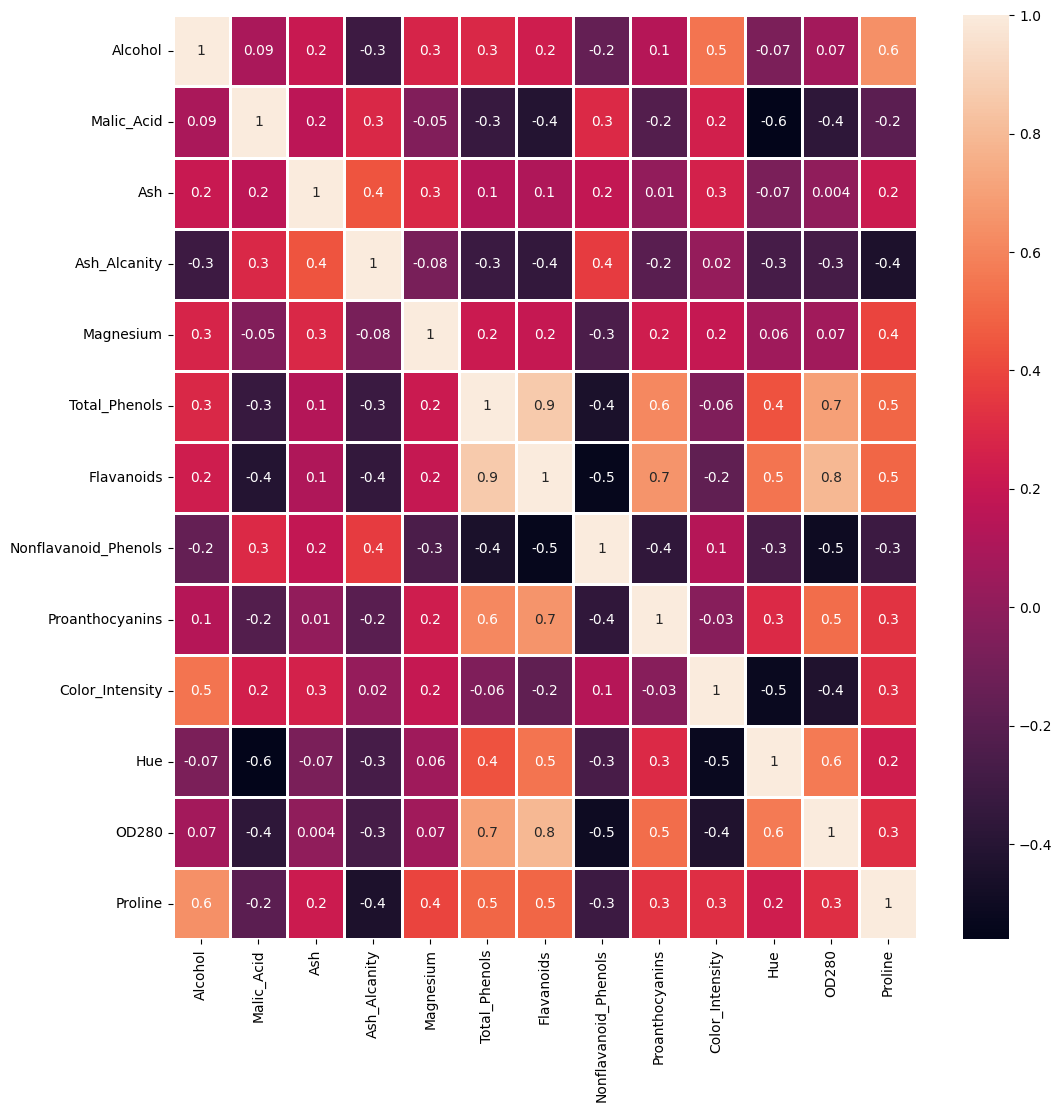

In [13]:
# MOstrar la filas y columnas con el tamaño usando MatplotLib subplots y luego combinandolo con un mapa de calor de Seaborn para detectar los valores más alto para detectar las variables mas correlacionadas   
f,ax = plt.subplots(figsize=(12,12))
# METHOD PEARSON
# En estadística, el coeficiente de correlación de Pearson es una medida de dependencia lineal entre dos variables aleatorias cuantitativas. A diferencia de la covarianza, la correlación de Pearson es independiente de la escala de medida de las variables.
# De manera menos formal, podemos definir el coeficiente de correlación de Pearson como un índice que puede utilizarse para medir el grado de relación de dos variables siempre y cuando ambas sean cuantitativas y continuas.
sns.heatmap(df.corr(method='pearson'),annot=True,fmt=".1g",linewidths=1,ax=ax)
plt.show()


- Correlaciones más altas y bajas

In [14]:
# Define the threshold
threshold = 0.5

corr = df.corr(method='pearson')

# Find pairs that match the threshold or are higher
matching_pairs = corr[((corr != 1.0) & (corr >= threshold)) | ((corr != 1.0) & (corr <= -threshold))].stack().reset_index()
matching_pairs.columns = ['Row', 'Column', 'Correlation']


# Remove duplicate pairs (e.g., (A, B) and (B, A))
matching_pairs['Sorted'] = matching_pairs.apply(lambda x: tuple(sorted([x['Row'], x['Column']])), axis=1)
matching_pairs = matching_pairs.drop_duplicates(subset='Sorted').drop(columns='Sorted')

# Ordenar por correlación en orden descendente
matching_pairs = matching_pairs.sort_values(by='Correlation', ascending=False)

# Reset the index
matching_pairs = matching_pairs.reset_index(drop=True)

print(matching_pairs)



                     Row                Column  Correlation
0          Total_Phenols            Flavanoids     0.864564
1             Flavanoids                 OD280     0.787194
2          Total_Phenols                 OD280     0.699949
3             Flavanoids       Proanthocyanins     0.652692
4                Alcohol               Proline     0.643720
5          Total_Phenols       Proanthocyanins     0.612413
6                    Hue                 OD280     0.565468
7                Alcohol       Color_Intensity     0.546364
8             Flavanoids                   Hue     0.543479
9        Proanthocyanins                 OD280     0.519067
10  Nonflavanoid_Phenols                 OD280    -0.503270
11       Color_Intensity                   Hue    -0.521813
12            Flavanoids  Nonflavanoid_Phenols    -0.537900
13            Malic_Acid                   Hue    -0.561296


Se aprecia como las variables con mayor correlacion tienden a tener una distribución lineal son las mismas del Q-Q Plot:
Total_Phenols - Flavanoids
Flavanoids - 0280

- Decisión de unir las variables con mayor relacion lineal

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_custom = df
df_custom[['Total_Phenols', 'Flavanoids']] = scaler.fit_transform(df_custom[['Total_Phenols', 'Flavanoids']])


# Usar las correlaciones para definir los coeficientes
coef_total_phenols = corr.loc['Total_Phenols', 'Flavanoids']
coef_flavanoids = corr.loc['Flavanoids', 'Total_Phenols']

# Normalizar coeficientes si es necesario
total_coef = coef_total_phenols + coef_flavanoids
coef_total_phenols /= total_coef
coef_flavanoids /= total_coef

# Combinar las variables usando los coeficientes calculados
df_custom['Phenols_Flavanoids'] = (coef_total_phenols * df_custom['Total_Phenols']) + (coef_flavanoids * df_custom['Flavanoids'])

# Eliminar las columnas de origen del coeficient
df_custom = df_custom.drop(columns=['Flavanoids', 'Total_Phenols'])


In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Escalar los datos
scaler = StandardScaler()
df_custom_scaled = scaler.fit_transform(df_custom)

# Convertir el array escalado de nuevo a un DataFrame
df_custom_scaled = pd.DataFrame(df_custom_scaled, columns=df_custom.columns)

# Regresión lineal
for column in df_custom_scaled.columns:
    if column != 'Phenols_Flavanoids':  # Suponiendo que 'Phenols_Flavanoids' es la variable dependiente
        X = df_custom_scaled[[column]]
        y = df_custom_scaled['Phenols_Flavanoids']
        model = LinearRegression().fit(X, y)
        r_sq = model.score(X, y)
        print(f'R² for Phenols_Flavanoids vs {column}: {r_sq}')



R² for Phenols_Flavanoids vs Alcohol: 0.07416955554117077
R² for Phenols_Flavanoids vs Malic_Acid: 0.14930438641257182
R² for Phenols_Flavanoids vs Ash: 0.015972566705049318
R² for Phenols_Flavanoids vs Ash_Alcanity: 0.12127064161315626
R² for Phenols_Flavanoids vs Magnesium: 0.04511826438654298
R² for Phenols_Flavanoids vs Nonflavanoid_Phenols: 0.26167459970568396
R² for Phenols_Flavanoids vs Proanthocyanins: 0.4291863182597119
R² for Phenols_Flavanoids vs Color_Intensity: 0.013880848397455847
R² for Phenols_Flavanoids vs Hue: 0.25604959912842984
R² for Phenols_Flavanoids vs OD280: 0.5930597417180534
R² for Phenols_Flavanoids vs Proline: 0.2640497844137214


- ### CON LA COLUMNA NUEVA, Volvemos a mostrar la matriz de correlacion

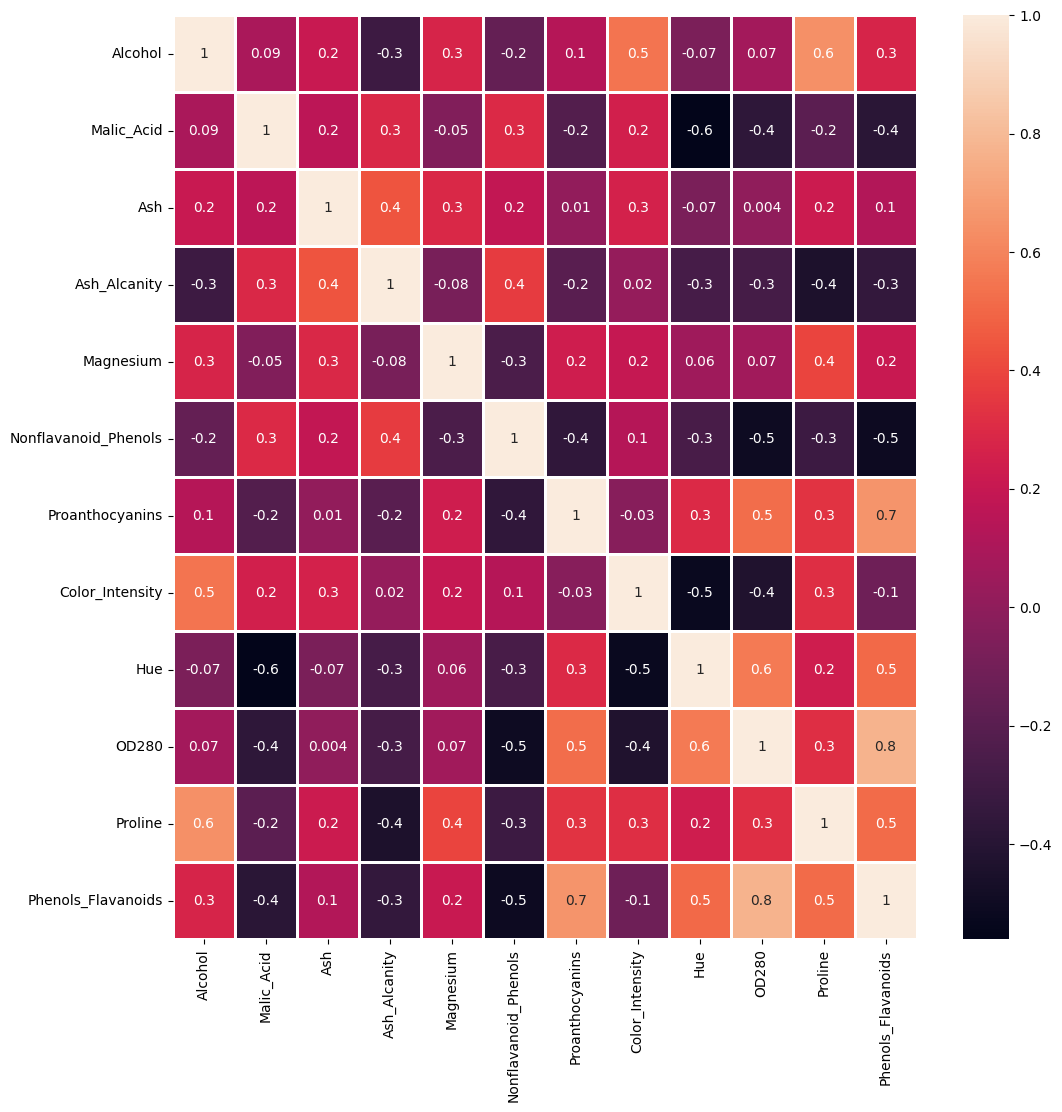

In [17]:
# MOstrar la filas y columnas con el tamaño usando MatplotLib subplots y luego combinandolo con un mapa de calor de Seaborn para detectar los valores más alto para detectar las variables mas correlacionadas   
f,ax = plt.subplots(figsize=(12,12))
# METHOD PEARSON
# En estadística, el coeficiente de correlación de Pearson es una medida de dependencia lineal entre dos variables aleatorias cuantitativas. A diferencia de la covarianza, la correlación de Pearson es independiente de la escala de medida de las variables.
# De manera menos formal, podemos definir el coeficiente de correlación de Pearson como un índice que puede utilizarse para medir el grado de relación de dos variables siempre y cuando ambas sean cuantitativas y continuas.
sns.heatmap(df_custom.corr(method='pearson'),annot=True,fmt=".1g",linewidths=1,ax=ax)
plt.show()

Vemos que destaca la relacion de Phenols_Flavanoids con OD280.

-  Hacemos el coeficiente con OD280 de nuevo.



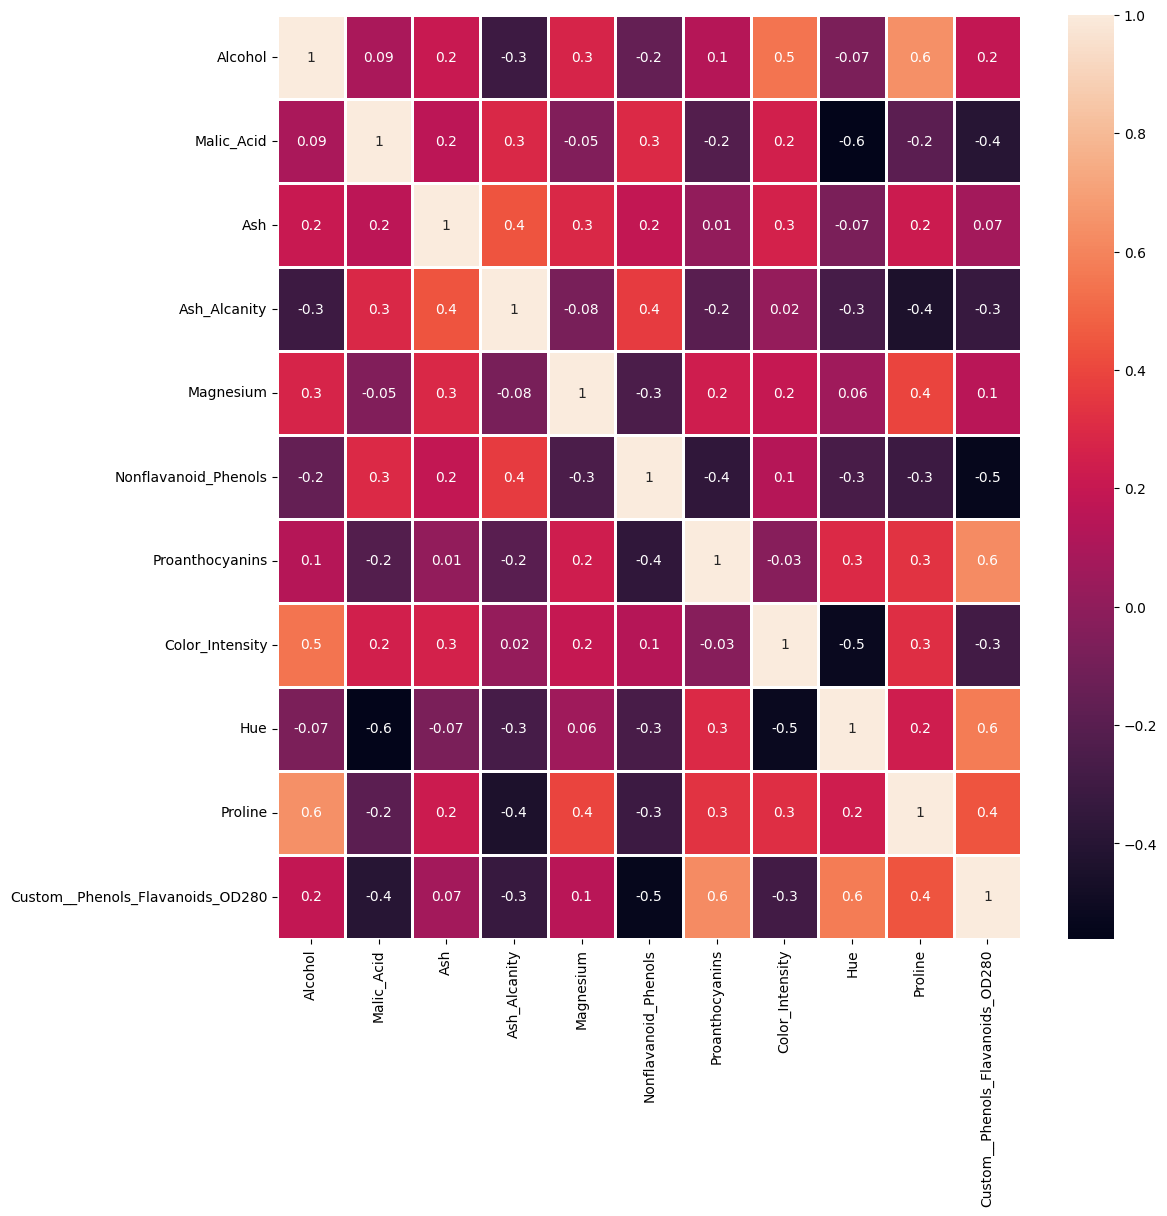

In [18]:
from sklearn.preprocessing import StandardScaler


corr_2 = df_custom.corr(method='pearson')

scaler = StandardScaler()
df_custom[['Phenols_Flavanoids', 'OD280']] = scaler.fit_transform(df_custom[['Phenols_Flavanoids', 'OD280']])


# Usar las correlaciones para definir los coeficientes
coef_phenols_flavanoids = corr_2.loc['Phenols_Flavanoids', 'OD280']
coef_OD280= corr_2.loc['OD280', 'Phenols_Flavanoids']

# Normalizar coeficientes si es necesario
total_coef_2 = coef_phenols_flavanoids + coef_OD280
coef_phenols_flavanoids /= total_coef_2
coef_OD280 /= total_coef_2

# Combinar las variables usando los coeficientes calculados
df_custom['Custom__Phenols_Flavanoids_OD280'] = (coef_phenols_flavanoids * df_custom['Phenols_Flavanoids']) + (coef_OD280 * df_custom['OD280'])

# Eliminar las columnas de origen del coeficiente
df_custom = df_custom.drop(columns=['OD280', 'Phenols_Flavanoids'])

# MOstrar la filas y columnas con el tamaño usando MatplotLib subplots y luego combinandolo con un mapa de calor de Seaborn para detectar los valores más alto para detectar las variables mas correlacionadas   
f,ax = plt.subplots(figsize=(12,12))
# METHOD PEARSON
# En estadística, el coeficiente de correlación de Pearson es una medida de dependencia lineal entre dos variables aleatorias cuantitativas. A diferencia de la covarianza, la correlación de Pearson es independiente de la escala de medida de las variables.
# De manera menos formal, podemos definir el coeficiente de correlación de Pearson como un índice que puede utilizarse para medir el grado de relación de dos variables siempre y cuando ambas sean cuantitativas y continuas.
sns.heatmap(df_custom.corr(method='pearson'),annot=True,fmt=".1g",linewidths=1,ax=ax)
plt.show()




El mayor es 0.6 y el menor -0,6

No parece necesario volver a realizar un coeficiente

## 4. Seleccion variables y preparación de datos

### 4.1 Train/Test split

En este punto se procederá a la división del conjunto de datos, en conjunto de entrenamiento y prueba.

También hacemos un escalado de los datos

In [19]:
# Separacion en variables entrada/salida
X = df_custom
y = original_df['Customer_Segment']



### 4.2. Selección de variables en base al EDA
Con el EDA previo podemos decidir qué variables utilizar para el modelo. Para este primer análisis elegiremos de entre las variables numéricas y las categóricas ordinales, aquellas que tengan una correlación con respecto a la variable de salida de al menos 0.21.

Con respecto a las variables categóricas no ordinales (binarias y multiclase), elegiremos aquellas que han rechazado H0 en el contraste de hipótesis y que por tanto sus grupos tienen diferencias en la media del valor de la variable de salida.

Si se quiere predecir la calificación final se podrían plantear dos modelos: uno que hiciese su predicción antes de comenzar el curso (es decir, que no se tuviese la calificación de ningún semestre aun) u otro que lo hiciese durante el curso cuando ya se tuviese la calificación de alguno de los semestres.

Como se ha visto en el EDA las calificaciones obtenidas durante los semestres influyen enormemente en la calificación final (hay mucha correlación), por lo que aparentemente podrían ser variables muy útiles para predecir la calificación final. No obstante, en primer lugar y simulando que se quisiese poder predecir las calificaciones lo antes posible se va a trabajar sin ese conocimiento de las notas de los semestres e intentando predecir la calificación final del estudiante en función de sus datos de perfil, a los cuales se tendría acceso desde el principio del curso.

Un comentario final es que las variables predictoras no deben tener una correlación excesiva entre ellas (no superar el 0.8) ya que serían en esencia la misma variable. Este punto no lo comprobamos automáticamente ya que ya habíamos visto que no se daba en ningún caso.

In [20]:
# Define the threshold
threshold = 0.2

corr = df_custom.corr(method='pearson')

# Find pairs that match the threshold or are higher
matching_pairs = corr[((corr != 1.0) & (corr >= threshold)) | ((corr != 1.0) & (corr <= -threshold))].stack().reset_index()
matching_pairs.columns = ['Row', 'Column', 'Correlation']


# Remove duplicate pairs (e.g., (A, B) and (B, A))
matching_pairs['Sorted'] = matching_pairs.apply(lambda x: tuple(sorted([x['Row'], x['Column']])), axis=1)
matching_pairs = matching_pairs.drop_duplicates(subset='Sorted').drop(columns='Sorted')

# Ordenar por correlación en orden descendente
matching_pairs = matching_pairs.sort_values(by='Correlation', ascending=False)

# Reset the index
matching_pairs = matching_pairs.reset_index(drop=True)

print(matching_pairs)



                     Row                            Column  Correlation
0                Alcohol                           Proline     0.643720
1        Proanthocyanins  Custom__Phenols_Flavanoids_OD280     0.624057
2                    Hue  Custom__Phenols_Flavanoids_OD280     0.569469
3                Alcohol                   Color_Intensity     0.546364
4                    Ash                      Ash_Alcanity     0.443367
5                Proline  Custom__Phenols_Flavanoids_OD280     0.439330
6              Magnesium                           Proline     0.393351
7           Ash_Alcanity              Nonflavanoid_Phenols     0.361922
8        Proanthocyanins                           Proline     0.330417
9        Color_Intensity                           Proline     0.316100
10       Proanthocyanins                               Hue     0.295544
11            Malic_Acid              Nonflavanoid_Phenols     0.292977
12            Malic_Acid                      Ash_Alcanity     0

## 4.1. K-MEANS++ con todas las variables en crudo

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
import numpy as np
from sklearn import neighbors
# Metricas de evaluacion
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

# Separacion en variables entrada/salida
original_df = pd.read_csv('Wine.csv')
df_scaled = scaler.fit_transform(df)
X = df
y = original_df['Customer_Segment']



# Entrenar KMeans++
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
kmeans.fit(X)

# Predicciones
y_pred = kmeans.predict(X)
y_true = y



### 4.1.1. EVALUACION DEL MODELO. - Error absoluto y relativo, error medio absoluto (MAE), error mediano, error cuadrático medio (RMSE), Precision, Accuracy, Recall, F1 score, Matriz de confusión


In [22]:
# Error absoluto y relativo
error_abs = np.abs(y_true - y_pred)
error_rel = error_abs / y_true

# MAE
mae = mean_absolute_error(y_true, y_pred)

# MedAE (Error mediano absoluto)
medae = np.median(error_abs)

# MSE y RMSE
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

# R2
r2 = r2_score(y_true, y_pred)

# Accuracy
accuracy = accuracy_score(y_true, y_pred)

# Precision
precision = precision_score(y_true, y_pred, average='weighted')

# Recall
recall = recall_score(y_true, y_pred, average='weighted')

# F1 Score
f1 = f1_score(y_true, y_pred, average='weighted')

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)

# ROC y AUC (para casos binarios o si se define un "umbral" de probabilidad)
fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)

# Mostrar los resultados
print(f"MAE: {mae}")
print(f"MedAE: {medae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC: {roc_auc}")
print("Confusion Matrix:")
print(conf_matrix)


MAE: 1.1235955056179776
MedAE: 1.0
MSE: 2.3258426966292136
RMSE: 1.5250713742737465
R2: -2.8938969616908836
Accuracy: 0.3707865168539326
Precision: 0.45307812728941255
Recall: 0.3707865168539326
F1 Score: 0.40764567768796595
AUC: 0.6303233157669847
Confusion Matrix:
[[ 0  0  0  0]
 [ 0 46 13  0]
 [50  1 20  0]
 [19  0 29  0]]


/home/ubuntu/anaconda3/envs/modulo_3_caso_practico/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ubuntu/anaconda3/envs/modulo_3_caso_practico/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Vemos que la amtriz de confusion no es la esperada.

### 4.1.2. CORRECCIÓN CON MAPEO Para la matriz de confusion y la evaluación del modelo

- Obteniendo el mejor mapeo
De est manera podemos obtener una equivalencia entre los datos predichos [0, 1, 2] Y la el resultado de test [1, 2, 3].

Ya que el al ser un modelo no supervisado y mezclarlo con datos de test, el orden de la clasificación puede ser distinto.

Para conseguirlo, realizaremos un bucle entre las opciones y nos quedaremos con el mejor accuracy.


In [23]:
from itertools import permutations
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

def obtener_mejor_mapeo(y_true, y_pred):
    # Etiquetas únicas en y_true (deberían ser 1, 2, 3)
    etiquetas_verdaderas = np.unique(y_true)
    
    # Etiquetas predichas únicas (antes de reordenar)
    etiquetas_predichas = np.unique(y_pred)
    
    # Todas las permutaciones posibles de las etiquetas predichas
    posibles_mapeos = list(permutations(etiquetas_predichas))
    
    # Variable para almacenar el mejor mapeo y la mejor matriz de confusión
    mejor_mapeo = None
    mejor_conf_matrix = None
    mejor_accuracy = 0
    
    # Probar cada mapeo posible
    for mapeo in posibles_mapeos:
        # Crear un diccionario de mapeo entre etiquetas predichas y verdaderas
        mapeo_dict = {etiqueta_predicha: etiqueta_verdadera for etiqueta_predicha, etiqueta_verdadera in zip(mapeo, etiquetas_verdaderas)}
        
        # Reetiquetar las predicciones de acuerdo con el mapeo
        y_pred_map = np.array([mapeo_dict[label] for label in y_pred])
        
        # Calcular la matriz de confusión
        conf_matrix = confusion_matrix(y_true, y_pred_map)
        
        # Calcular la precisión de este mapeo
        accuracy = accuracy_score(y_true, y_pred_map)
        
        # Si esta precisión es mejor que la mejor encontrada hasta ahora, actualizar
        if accuracy > mejor_accuracy:
            mejor_accuracy = accuracy
            mejor_mapeo = mapeo_dict
            mejor_conf_matrix = conf_matrix
    
    return mejor_mapeo, mejor_conf_matrix, mejor_accuracy

# Obtener el mejor mapeo y matriz de confusión para y_true
mejor_mapeo_pred, mejor_conf_matrix, mejor_accuracy_pred = obtener_mejor_mapeo(y_true, y_pred)

# Imprimir los resultados para y_true
print(f"\n- Resultados para y_true:")
print(f"Mejor mapeo de etiquetas (prueba): {mejor_mapeo_pred}")
print("Matriz de confusión (prueba) con el mejor mapeo:")
print(mejor_conf_matrix)
print(f"Accuracy (prueba) con el mejor mapeo: {mejor_accuracy_pred:.2f}")



- Resultados para y_true:
Mejor mapeo de etiquetas (prueba): {1: 1, 0: 2, 2: 3}
Matriz de confusión (prueba) con el mejor mapeo:
[[46  0 13]
 [ 1 50 20]
 [ 0 19 29]]
Accuracy (prueba) con el mejor mapeo: 0.70


- evaluando el modelo sobre el mejor mapeo

In [24]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import adjusted_rand_score, silhouette_score, v_measure_score
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

def evaluar_modelo(X_train, y_true, y_pred, mejor_mapeo_pred):
    # Alinear las predicciones con el mejor mapeo
    if mejor_mapeo_pred:
        y_pred_aligned = np.array([mejor_mapeo_pred[label] for label in y_pred])
    else:
        y_pred_aligned = y_pred

    # Calcular métricas para el conjunto de entrenamiento
    metrics_pred = {
        "Accuracy": accuracy_score(y_true, y_pred_aligned),
        "F1-Score": f1_score(y_true, y_pred_aligned, average='weighted'),
        "Precision": precision_score(y_true, y_pred_aligned, average='weighted'),
        "Recall": recall_score(y_true, y_pred_aligned, average='weighted'),
        "ARI": adjusted_rand_score(y_true, y_pred_aligned),
        "Silhouette": silhouette_score(X_train, y_pred_aligned),
        "V-Measure": v_measure_score(y_true, y_pred_aligned),
        "MAE": mean_absolute_error(y_true, y_pred_aligned),
        "MedAE": median_absolute_error(y_true, y_pred_aligned),
        "MSE": mean_squared_error(y_true, y_pred_aligned),
        "RMSE": mean_squared_error(y_true, y_pred_aligned, squared=False),
        "R2": r2_score(y_true, y_pred_aligned),
        "Confusion Matrix": confusion_matrix(y_true, y_pred_aligned),
    }

    return metrics_pred

# Ejemplo de uso de la función
# Separacion en variables entrada/salida
# original_df = pd.read_csv('Wine.csv')
# df_scaled = scaler.fit_transform(df)
# X = df
# y = original_df['Customer_Segment']
X_train = X
resultados = evaluar_modelo(X_train, y_true, y_pred, mejor_mapeo_pred)

# Para visualizar las métricas como una lista:
print("\nMétricas de Evaluación para el conjunto de entrenamiento:\n")
for metric, value in resultados.items():
    if metric == "Confusion Matrix":
        print(f"{metric}:\n{value}\n")
    else:
        print(f"{metric}: {value}")




Métricas de Evaluación para el conjunto de entrenamiento:

Accuracy: 0.702247191011236
F1-Score: 0.7147804707482469
Precision: 0.7395818489697105
Recall: 0.702247191011236
ARI: 0.37111371823084754
Silhouette: 0.5710767871562352
V-Measure: 0.4287568597645354
MAE: 0.3707865168539326
MedAE: 0.0
MSE: 0.5168539325842697
RMSE: 0.7189255403616356
R2: 0.13468956406869248
Confusion Matrix:
[[46  0 13]
 [ 1 50 20]
 [ 0 19 29]]



/home/ubuntu/anaconda3/envs/modulo_3_caso_practico/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### 4.1.3. EVALUANDO LOS RESULTADOS
SEÑALES DE SOBREAJUSTE:
    - Alta precisión: tanto en los datos de entrenamiento como en los de prueba
    - Alta exactitud: tanto en los datos de entrenamiento como en los de prueba
    - Alta Recall: tanto en los datos de entrenamiento como en los de prueba
    - Alto F1: tanto en los datos de entrenamiento como en los de prueba
    - ARI: tanto en los datos de entrenamiento como en los de prueba


Esto se debe a que se ha utilizado todas las columnas de datos y no las columnas seleccionadas
Vamos a realizar otro modelos con las columnas seleccionadas

## 4.3. K-MEANS++ con features seleccionadas

### 4.3.1. Train/Test Split con los features seleccionadas

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd


# Define el threshold y calcula la matriz de correlación
threshold = 0.2
corr = df_custom_scaled.corr(method='pearson')

# Encuentra los pares de variables que cumplen con el umbral
matching_pairs = corr[((corr != 1.0) & (corr >= threshold)) | ((corr != 1.0) & (corr <= -threshold))].stack().reset_index()
matching_pairs.columns = ['Row', 'Column', 'Correlation']

# Elimina pares duplicados (e.g., (A, B) y (B, A))
matching_pairs['Sorted'] = matching_pairs.apply(lambda x: tuple(sorted([x['Row'], x['Column']])), axis=1)
matching_pairs = matching_pairs.drop_duplicates(subset='Sorted').drop(columns='Sorted')

# Obtener un conjunto único de variables seleccionadas
variables_seleccionadas = set(matching_pairs['Row']).union(set(matching_pairs['Column']))

# Ajustar X_custom a las variables seleccionadas
X_custom = df_custom_scaled[list(variables_seleccionadas)]

# Entrenar KMeans++ con las variables seleccionadas
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
kmeans.fit(X_custom)

# Predicciones
y_pred_custom = kmeans.predict(X_custom)
y_true = original_df['Customer_Segment']



### 4.3.2. Evaluacion del modelo con el mejor mapeo

In [26]:
from itertools import permutations
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

def obtener_mejor_mapeo(y_true, y_pred):
    # Etiquetas únicas en y_true (deberían ser 1, 2, 3)
    etiquetas_verdaderas = np.unique(y_true)
    
    # Etiquetas predichas únicas (antes de reordenar)
    etiquetas_predichas = np.unique(y_pred)
    
    # Todas las permutaciones posibles de las etiquetas predichas
    posibles_mapeos = list(permutations(etiquetas_predichas))
    
    # Variable para almacenar el mejor mapeo y la mejor matriz de confusión
    mejor_mapeo = None
    mejor_conf_matrix = None
    mejor_accuracy = 0
    
    # Probar cada mapeo posible
    for mapeo in posibles_mapeos:
        # Crear un diccionario de mapeo entre etiquetas predichas y verdaderas
        mapeo_dict = {etiqueta_predicha: etiqueta_verdadera for etiqueta_predicha, etiqueta_verdadera in zip(mapeo, etiquetas_verdaderas)}
        
        # Reetiquetar las predicciones de acuerdo con el mapeo
        y_pred_map = np.array([mapeo_dict[label] for label in y_pred])
        
        # Calcular la matriz de confusión
        conf_matrix = confusion_matrix(y_true, y_pred_map)
        
        # Calcular la precisión de este mapeo
        accuracy = accuracy_score(y_true, y_pred_map)
        
        # Si esta precisión es mejor que la mejor encontrada hasta ahora, actualizar
        if accuracy > mejor_accuracy:
            mejor_accuracy = accuracy
            mejor_mapeo = mapeo_dict
            mejor_conf_matrix = conf_matrix
    
    return mejor_mapeo, mejor_conf_matrix, mejor_accuracy


# Obtener el mejor mapeo y matriz de confusión para y_custom
mejor_mapeo_custom, mejor_conf_matrix_custom, mejor_accuracy_custom = obtener_mejor_mapeo(y_true, y_pred_custom)

# Imprimir los resultados para y_custom
print(f"\n- Resultados para y_custom:")
print(f"Mejor mapeo de etiquetas custom (entrenamiento custom): {mejor_mapeo_custom}")
print("Matriz de confusión (entrenamiento custom) con el mejor mapeo:")
print(mejor_conf_matrix_custom)
print(f"Accuracy (entrenamiento custom) con el mejor mapeo: {mejor_accuracy_custom:.2f}")





- Resultados para y_custom:
Mejor mapeo de etiquetas custom (entrenamiento custom): {2: 1, 0: 2, 1: 3}
Matriz de confusión (entrenamiento custom) con el mejor mapeo:
[[59  0  0]
 [ 2 66  3]
 [ 0  0 48]]
Accuracy (entrenamiento custom) con el mejor mapeo: 0.97


/home/ubuntu/anaconda3/envs/modulo_3_caso_practico/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



Métricas de Evaluación para el conjunto de entrenamiento:

Accuracy: 0.9719101123595506
F1-Score: 0.9717465187427461
Precision: 0.9732699121276802
Recall: 0.9719101123595506
ARI: 0.9148795960669529
Silhouette: 0.2856320876102222
V-Measure: 0.8925851652969188
MAE: 0.028089887640449437
MedAE: 0.0
MSE: 0.028089887640449437
RMSE: 0.16760038078849773
R2: 0.9529722589167767
Confusion Matrix:
[[59  0  0]
 [ 2 66  3]
 [ 0  0 48]]

ROC AUC Class 1: 0.9915966386554621
ROC AUC Class 2: 0.9647887323943662
ROC AUC Class 3: 0.9884615384615384


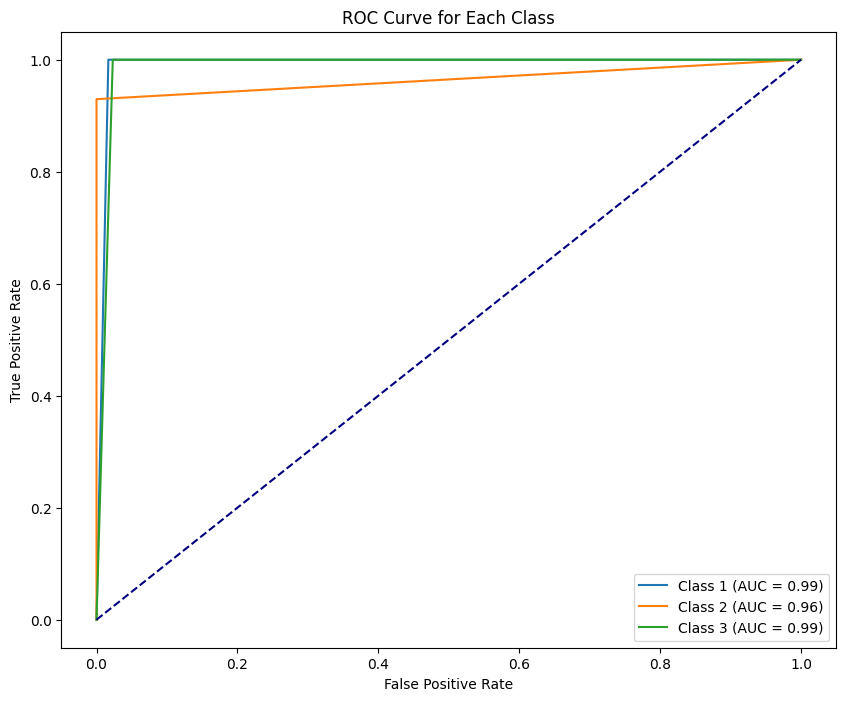

In [27]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import adjusted_rand_score, silhouette_score, v_measure_score
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def evaluar_modelo(X_train, y_true, y_pred, mejor_mapeo_pred):
    # Alinear las predicciones con el mejor mapeo
    if mejor_mapeo_pred:
        y_pred_aligned = np.array([mejor_mapeo_pred[label] for label in y_pred])
    else:
        y_pred_aligned = y_pred

    # Calcular métricas para el conjunto de entrenamiento
    metrics_pred = {
        "Accuracy": accuracy_score(y_true, y_pred_aligned),
        "F1-Score": f1_score(y_true, y_pred_aligned, average='weighted'),
        "Precision": precision_score(y_true, y_pred_aligned, average='weighted'),
        "Recall": recall_score(y_true, y_pred_aligned, average='weighted'),
        "ARI": adjusted_rand_score(y_true, y_pred_aligned),
        "Silhouette": silhouette_score(X_train, y_pred_aligned),
        "V-Measure": v_measure_score(y_true, y_pred_aligned),
        "MAE": mean_absolute_error(y_true, y_pred_aligned),
        "MedAE": median_absolute_error(y_true, y_pred_aligned),
        "MSE": mean_squared_error(y_true, y_pred_aligned),
        "RMSE": mean_squared_error(y_true, y_pred_aligned, squared=False),
        "R2": r2_score(y_true, y_pred_aligned),
        "Confusion Matrix": confusion_matrix(y_true, y_pred_aligned),
    }

    # Calcular ROC AUC para cada clase
    roc_auc_dict = {}
    fpr_dict = {}
    tpr_dict = {}
    
    # Convertir y_true a formato binario de one-vs-all para cada clase
    y_true_binary = pd.get_dummies(y_true, columns=np.unique(y_true))

    for class_label in np.unique(y_true):
        # Obtén los puntajes ROC y las curvas
        fpr, tpr, _ = roc_curve(y_true_binary[class_label], y_pred_aligned == class_label)
        roc_auc = roc_auc_score(y_true_binary[class_label], y_pred_aligned == class_label)
        
        # Almacenar resultados en el diccionario
        roc_auc_dict[f"ROC AUC Class {class_label}"] = roc_auc
        fpr_dict[class_label] = fpr
        tpr_dict[class_label] = tpr
    
    # Agregar el diccionario de ROC AUC al diccionario de métricas
    metrics_pred.update(roc_auc_dict)
    
    return metrics_pred, fpr_dict, tpr_dict

# Separacion en variables entrada/salida
X_train_custom = X_custom

# Evaluar el modelo y obtener las métricas
resultados, fpr_dict, tpr_dict = evaluar_modelo(X_train_custom, y_true, y_pred_custom, mejor_mapeo_custom)

# Para visualizar las métricas como una lista:
print("\nMétricas de Evaluación para el conjunto de entrenamiento:\n")
for metric, value in resultados.items():
    if metric == "Confusion Matrix":
        print(f"{metric}:\n{value}\n")
    else:
        print(f"{metric}: {value}")

# Opcional: Graficar las curvas ROC
plt.figure(figsize=(10, 8))
for class_label in np.unique(y_true):
    plt.plot(fpr_dict[class_label], tpr_dict[class_label], label=f"Class {class_label} (AUC = {resultados[f'ROC AUC Class {class_label}']:.2f})")

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc="lower right")
plt.show()



### 4.3.3. Visualizar los datos:

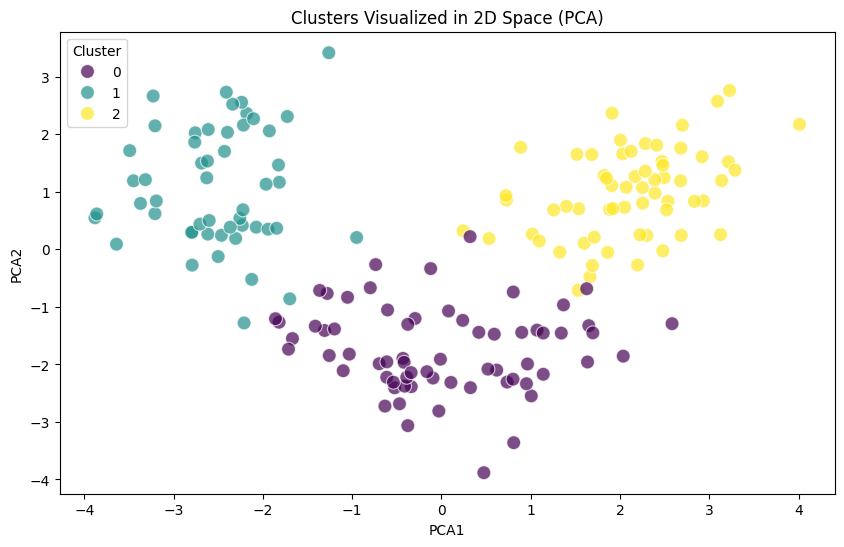

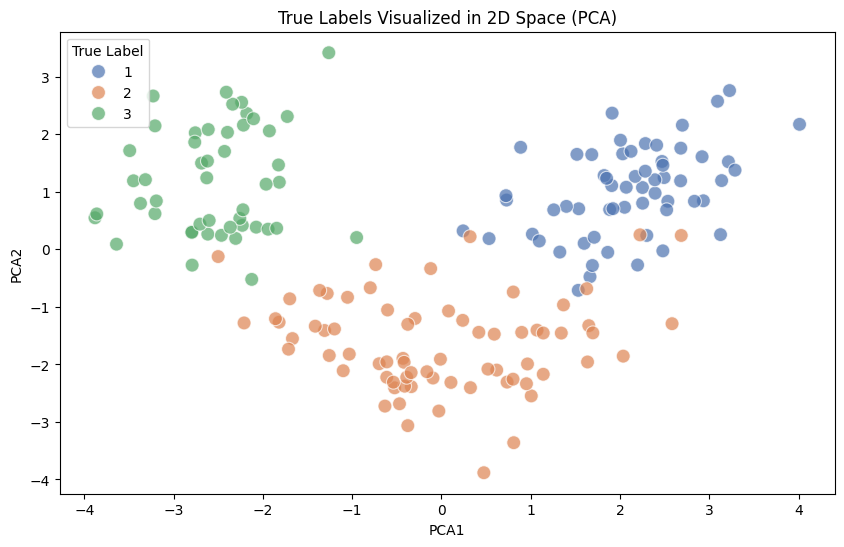

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Reducción de dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_custom)

# Crear un DataFrame para facilitar la visualización
df_viz = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_viz['Cluster'] = y_pred_custom
df_viz['True_Label'] = y_true

# Visualización de los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_viz, palette='viridis', s=100, alpha=0.7)
plt.title('Clusters Visualized in 2D Space (PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

# Opcional: Visualización con las etiquetas verdaderas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='True_Label', data=df_viz, palette='deep', s=100, alpha=0.7)
plt.title('True Labels Visualized in 2D Space (PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='True Label')
plt.show()


Ahora tenemos datos con menor Sobreajuste

Además. vemos como el Silhouette ha mejorado, lo que indica mejor ajuste de los clusters

## 4.4. KMEANS++ con PCA

### 4.4.1. Train/Test Split con todas las features

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset
original_df = pd.read_csv('Wine.csv')

# Separate features and target variable
X = original_df.drop('Customer_Segment', axis=1)
y = original_df['Customer_Segment']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 4.4.2. APLICAR PCA

#### 4.4.2.a. Funcion evaluar modelo

In [30]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import adjusted_rand_score, silhouette_score, v_measure_score
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def evaluar_modelo(X_train, y_true, y_pred, mejor_mapeo_pred):
    # Alinear las predicciones con el mejor mapeo
    if mejor_mapeo_pred:
        y_pred_aligned = np.array([mejor_mapeo_pred[label] for label in y_pred])
    else:
        y_pred_aligned = y_pred

    # Calcular métricas para el conjunto de entrenamiento
    metrics_pred = {
        "Accuracy": accuracy_score(y_true, y_pred_aligned),
        "F1-Score": f1_score(y_true, y_pred_aligned, average='weighted'),
        "Precision": precision_score(y_true, y_pred_aligned, average='weighted'),
        "Recall": recall_score(y_true, y_pred_aligned, average='weighted'),
        "ARI": adjusted_rand_score(y_true, y_pred_aligned),
        "Silhouette": silhouette_score(X_train, y_pred_aligned),
        "V-Measure": v_measure_score(y_true, y_pred_aligned),
        "MAE": mean_absolute_error(y_true, y_pred_aligned),
        "MedAE": median_absolute_error(y_true, y_pred_aligned),
        "MSE": mean_squared_error(y_true, y_pred_aligned),
        "RMSE": mean_squared_error(y_true, y_pred_aligned, squared=False),
        "R2": r2_score(y_true, y_pred_aligned),
        "Confusion Matrix": confusion_matrix(y_true, y_pred_aligned),
    }

    # Calcular ROC AUC para cada clase
    roc_auc_dict = {}
    fpr_dict = {}
    tpr_dict = {}
    
    # Convertir y_true a formato binario de one-vs-all para cada clase
    y_true_binary = pd.get_dummies(y_true, columns=np.unique(y_true))

    for class_label in np.unique(y_true):
        # Obtén los puntajes ROC y las curvas
        fpr, tpr, _ = roc_curve(y_true_binary[class_label], y_pred_aligned == class_label)
        roc_auc = roc_auc_score(y_true_binary[class_label], y_pred_aligned == class_label)
        
        # Almacenar resultados en el diccionario
        roc_auc_dict[f"ROC AUC Class {class_label}"] = roc_auc
        fpr_dict[class_label] = fpr
        tpr_dict[class_label] = tpr
    
    # Agregar el diccionario de ROC AUC al diccionario de métricas
    metrics_pred.update(roc_auc_dict)
    
    return {
        "metrics_pred": metrics_pred,
        "fpr_dict": fpr_dict,
        "tpr_dict": tpr_dict
    }

#### 4.4.2.b. Mostrar el numero de features seleccionadas

In [31]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
original_df = pd.read_csv('Wine.csv')

# Separate features and target variable
X = original_df.drop('Customer_Segment', axis=1)
y = original_df['Customer_Segment']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to retain 97% of variance
pca = PCA(n_components=0.95)  # Retain 97% of the variance
X_pca = pca.fit_transform(X_scaled)

print(f"Original number of features: {X_scaled.shape[1]}")
print(f"Reduced number of features after PCA: {X_pca.shape[1]}")

# Train KMeans on PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, init='k-means++', random_state=0)
y_pred_pca = kmeans_pca.fit_predict(X_pca)



Original number of features: 13
Reduced number of features after PCA: 10


In [32]:
# Calculate SSE (Sum of Squared Errors)
sse = kmeans_pca.inertia_

# Calculate the number of parameters k (number of clusters * number of features)
n_clusters = kmeans_pca.n_clusters
n_features = X_pca.shape[1]
n_params = n_clusters * n_features

# Calculate log-likelihood (L)
n_samples = X_pca.shape[0]
log_likelihood = -n_samples * np.log(sse / n_samples)

# Calculate AIC
aic = 2 * n_params - 2 * log_likelihood

# Calculate BIC
bic = np.log(n_samples) * n_params - 2 * log_likelihood

print(f"SSE: {sse}")
print(f"Log-Likelihood: {log_likelihood}")
print(f"AIC: {aic}")
print(f"BIC: {bic}")

SSE: 1189.6391379398026
Log-Likelihood: -338.1326705025877
AIC: 736.2653410051754
BIC: 831.7188475139379


/home/ubuntu/anaconda3/envs/modulo_3_caso_practico/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



Métricas de Evaluación para el conjunto de entrenamiento:

Accuracy: 0.9662921348314607
F1-Score: 0.9660128746456331
Precision: 0.9680990554975161
Recall: 0.9662921348314607
ARI: 0.8974949815093207
Silhouette: 0.29867482943692886
V-Measure: 0.875893534122307
MAE: 0.033707865168539325
MedAE: 0.0
MSE: 0.033707865168539325
RMSE: 0.18359701840863138
R2: 0.9435667107001321
Confusion Matrix:
[[59  0  0]
 [ 3 65  3]
 [ 0  0 48]]

ROC AUC Class 1: 0.9873949579831932
ROC AUC Class 2: 0.9577464788732395
ROC AUC Class 3: 0.9884615384615384


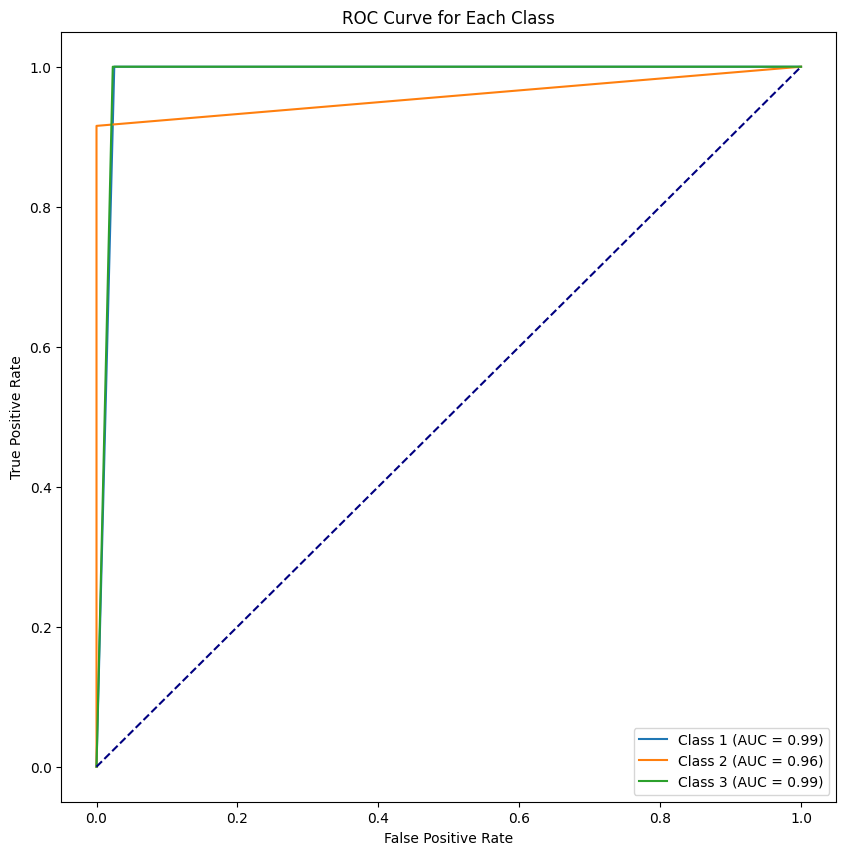

In [35]:
# Obtain the best mapping for the PCA model
mejor_mapeo, mejor_conf_matrix, mejor_accuracy = obtener_mejor_mapeo(y, y_pred_pca)


# Evaluar el modelo y obtener las métricas
import numpy as np
import matplotlib.pyplot as plt

# Evaluar el modelo y obtener las métricas
resultados = evaluar_modelo(X_pca, y_true, y_pred_pca, mejor_mapeo)

# Extraer métricas y curvas ROC del resultado
metrics_pred = resultados["metrics_pred"]
fpr_dict = resultados["fpr_dict"]
tpr_dict = resultados["tpr_dict"]

# Para visualizar las métricas como una lista:
print("\nMétricas de Evaluación para el conjunto de entrenamiento:\n")
for metric, value in metrics_pred.items():
    if metric == "Confusion Matrix":
        print(f"{metric}:\n{value}\n")
    else:
        print(f"{metric}: {value}")

# Opcional: Graficar las curvas ROC
plt.figure(figsize=(10, 10))
for class_label in np.unique(y_true):
    if class_label in fpr_dict and class_label in tpr_dict and f"ROC AUC Class {class_label}" in metrics_pred:
        plt.plot(fpr_dict[class_label], tpr_dict[class_label], 
                 label=f"Class {class_label} (AUC = {metrics_pred[f'ROC AUC Class {class_label}']:.2f})")

# Dibujar línea diagonal
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc="lower right")
plt.show()



#### 4.4.2.a. Mostrar resultados de evaluar_modelo PCA #################################


Métricas de Evaluación para el modelo PCA:

Accuracy: 0.9662921348314607
F1-Score: 0.9660128746456331
Precision: 0.9680990554975161
Recall: 0.9662921348314607
ARI: 0.8974949815093207
Silhouette: 0.29867482943692886
V-Measure: 0.875893534122307
MAE: 0.033707865168539325
MedAE: 0.0
MSE: 0.033707865168539325
RMSE: 0.18359701840863138
R2: 0.9435667107001321
Confusion Matrix:
[[59  0  0]
 [ 3 65  3]
 [ 0  0 48]]

ROC AUC Class 1: 0.9873949579831932
ROC AUC Class 2: 0.9577464788732395
ROC AUC Class 3: 0.9884615384615384


/home/ubuntu/anaconda3/envs/modulo_3_caso_practico/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


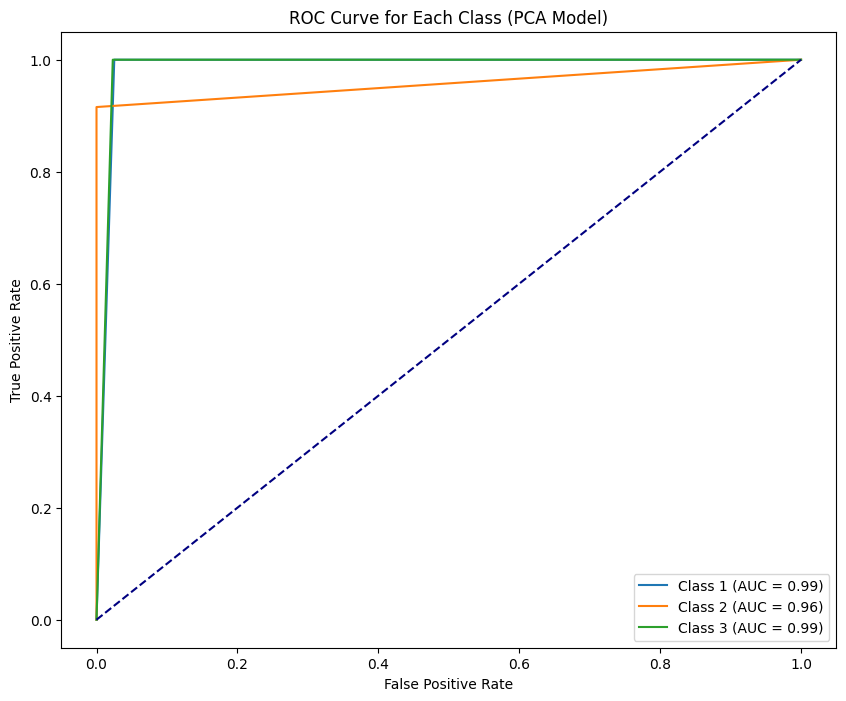

In [36]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import adjusted_rand_score, silhouette_score, v_measure_score
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def evaluar_modelo(X_train, y_true, y_pred, mejor_mapeo_pred):
    # Alinear las predicciones con el mejor mapeo
    if mejor_mapeo_pred:
        y_pred_aligned = np.array([mejor_mapeo_pred[label] for label in y_pred])
    else:
        y_pred_aligned = y_pred

    # Calcular métricas para el conjunto de entrenamiento
    metrics_pred = {
        "Accuracy": accuracy_score(y_true, y_pred_aligned),
        "F1-Score": f1_score(y_true, y_pred_aligned, average='weighted'),
        "Precision": precision_score(y_true, y_pred_aligned, average='weighted'),
        "Recall": recall_score(y_true, y_pred_aligned, average='weighted'),
        "ARI": adjusted_rand_score(y_true, y_pred_aligned),
        "Silhouette": silhouette_score(X_train, y_pred_aligned),
        "V-Measure": v_measure_score(y_true, y_pred_aligned),
        "MAE": mean_absolute_error(y_true, y_pred_aligned),
        "MedAE": median_absolute_error(y_true, y_pred_aligned),
        "MSE": mean_squared_error(y_true, y_pred_aligned),
        "RMSE": mean_squared_error(y_true, y_pred_aligned, squared=False),
        "R2": r2_score(y_true, y_pred_aligned),
        "Confusion Matrix": confusion_matrix(y_true, y_pred_aligned),
    }

    # Calcular ROC AUC para cada clase
    roc_auc_dict = {}
    fpr_dict = {}
    tpr_dict = {}
    
    # Convertir y_true a formato binario de one-vs-all para cada clase
    y_true_binary = pd.get_dummies(y_true, columns=np.unique(y_true))

    for class_label in np.unique(y_true):
        # Obtén los puntajes ROC y las curvas
        fpr, tpr, _ = roc_curve(y_true_binary[class_label], y_pred_aligned == class_label)
        roc_auc = roc_auc_score(y_true_binary[class_label], y_pred_aligned == class_label)
        
        # Almacenar resultados en el diccionario
        roc_auc_dict[f"ROC AUC Class {class_label}"] = roc_auc
        fpr_dict[class_label] = fpr
        tpr_dict[class_label] = tpr
    
    # Agregar el diccionario de ROC AUC al diccionario de métricas
    metrics_pred.update(roc_auc_dict)
    
    return metrics_pred, fpr_dict, tpr_dict

# Obtain the best mapping for the PCA model
mejor_mapeo_pca, mejor_conf_matrix_pca, mejor_accuracy_pca = obtener_mejor_mapeo(y, y_pred_pca)

# Evaluate the PCA model
resultados_pca, fpr_dict_pca, tpr_dict_pca = evaluar_modelo(X_pca, y, y_pred_pca, mejor_mapeo_pca)

# Print the evaluation metrics for PCA
print("\nMétricas de Evaluación para el modelo PCA:\n")
for metric, value in resultados_pca.items():
    if metric == "Confusion Matrix":
        print(f"{metric}:\n{value}\n")
    else:
        print(f"{metric}: {value}")

# Plot ROC Curves
plt.figure(figsize=(10, 8))
for class_label in np.unique(y):
    fpr = fpr_dict_pca[class_label]
    tpr = tpr_dict_pca[class_label]
    roc_auc = resultados_pca[f"ROC AUC Class {class_label}"]
    
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class (PCA Model)')
plt.legend(loc="lower right")
plt.show()


### 4.4.3. Visualizar los datos

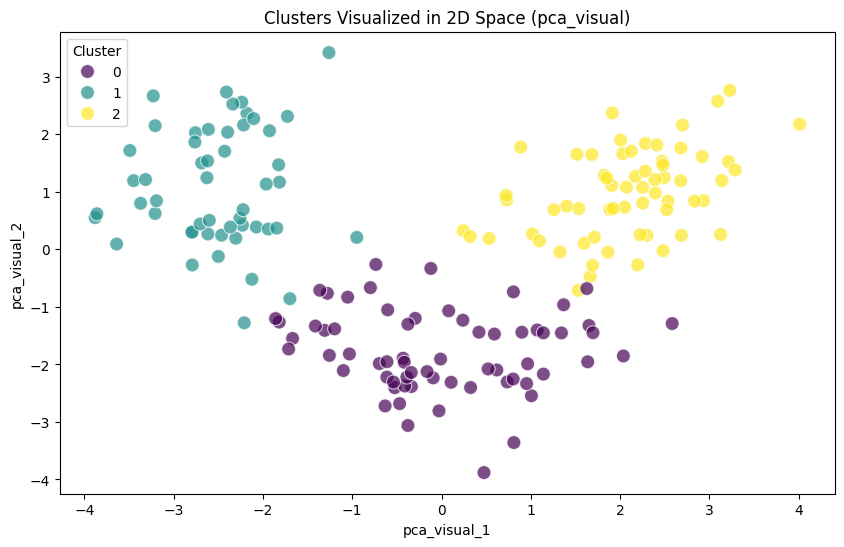

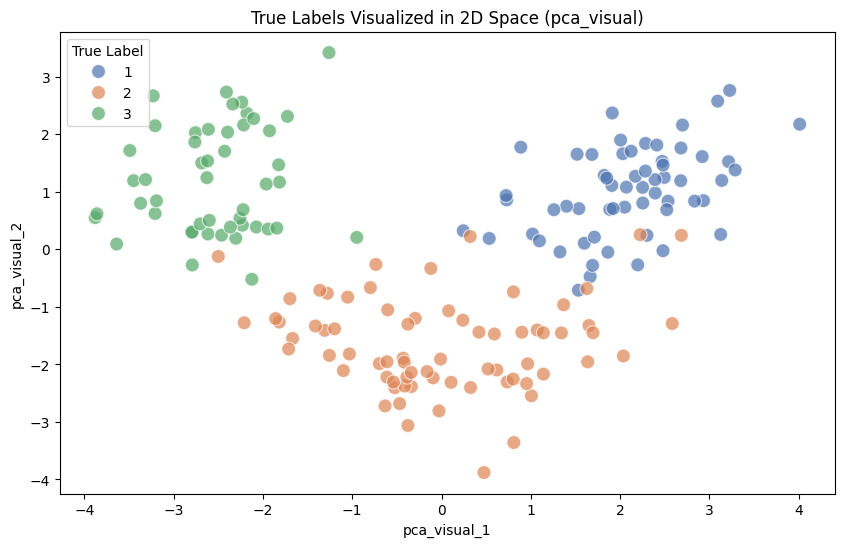

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Reducción de dimensionalidad a 2 componentes principales
pca_visual = PCA(n_components=2)
X_pca_visual = pca_visual.fit_transform(X_train_custom)

# Crear un DataFrame para facilitar la visualización
df_viz = pd.DataFrame(X_pca_visual, columns=['pca_visual_1', 'pca_visual_2'])
df_viz['Cluster'] = y_pred_pca
df_viz['True_Label'] = y_true

# Visualización de los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_visual_1', y='pca_visual_2', hue='Cluster', data=df_viz, palette='viridis', s=100, alpha=0.7)
plt.title('Clusters Visualized in 2D Space (pca_visual)')
plt.xlabel('pca_visual_1')
plt.ylabel('pca_visual_2')
plt.legend(title='Cluster')
plt.show()

# Opcional: Visualización con las etiquetas verdaderas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_visual_1', y='pca_visual_2', hue='True_Label', data=df_viz, palette='deep', s=100, alpha=0.7)
plt.title('True Labels Visualized in 2D Space (pca_visual)')
plt.xlabel('pca_visual_1')
plt.ylabel('pca_visual_2')
plt.legend(title='True Label')
plt.show()


## 4.4. ANN con PCA

# 5. EJEMPLO TODOS LOS MODELOS CON FUNCION EVLAUAR


Resultados K-Means:
 {'Accuracy': 0.9662921348314607, 'F1-Score': 0.9660128746456331, 'Precision': 0.9680990554975161, 'Recall': 0.9662921348314607, 'ARI': 0.8974949815093207, 'Silhouette': 0.29867482943692886, 'V-Measure': 0.875893534122307, 'SSE': 1189.6391379398026, 'Log-Likelihood': -338.1326705025877, 'AIC': 736.2653410051754, 'BIC': 831.7188475139379, 'Confusion Matrix': array([[59,  0,  0],
       [ 3, 65,  3],
       [ 0,  0, 48]]), 'ROC AUC Class 1': 0.9873949579831932, 'ROC AUC Class 2': 0.9577464788732395, 'ROC AUC Class 3': 0.9884615384615384}

Resultados Clustering Jerárquico:
 {'Accuracy': 0.9157303370786517, 'F1-Score': 0.9135835142474089, 'Precision': 0.9263218055352886, 'Recall': 0.9157303370786517, 'ARI': 0.7587370866635239, 'Silhouette': 0.2839520778138407, 'V-Measure': 0.762406421408809, 'Confusion Matrix': array([[59,  0,  0],
       [ 7, 56,  8],
       [ 0,  0, 48]]), 'ROC AUC Class 1': 0.9705882352941176, 'ROC AUC Class 2': 0.8943661971830985, 'ROC AUC Class 3'

/home/ubuntu/anaconda3/envs/modulo_3_caso_practico/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ubuntu/anaconda3/envs/modulo_3_caso_practico/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


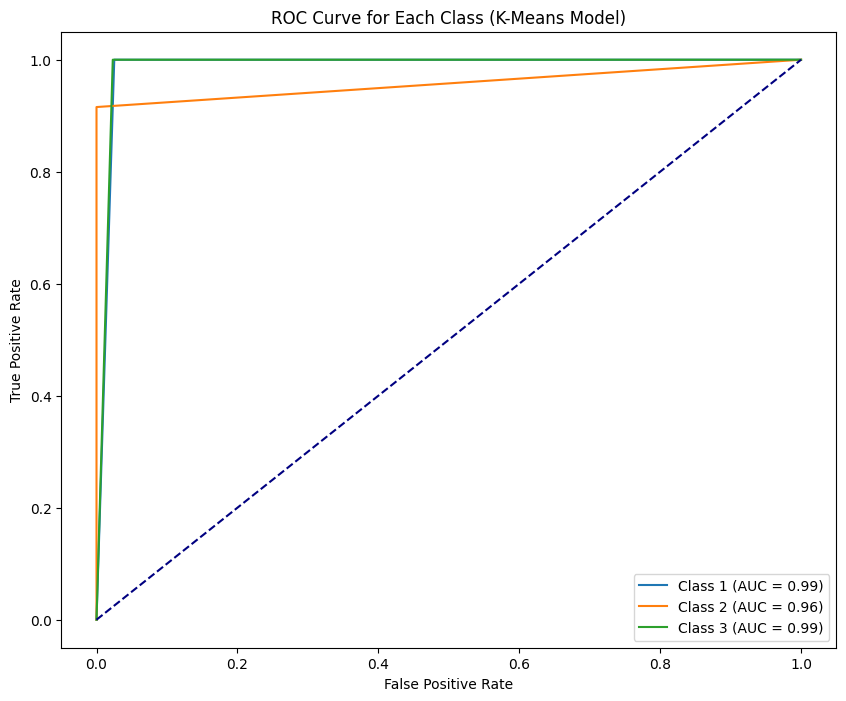

In [38]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import adjusted_rand_score, silhouette_score, v_measure_score
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def evaluar_modelo(X_train, y_true, y_pred, mejor_mapeo_pred=None, model_type='kmeans', model=None):
    # Alinear las predicciones con el mejor mapeo (para modelos de clustering)
    if mejor_mapeo_pred:
        y_pred_aligned = np.array([mejor_mapeo_pred[label] for label in y_pred])
    else:
        y_pred_aligned = y_pred

    # Inicializar el diccionario de métricas
    metrics_pred = {}

    # Métricas comunes
    metrics_pred["Accuracy"] = accuracy_score(y_true, y_pred_aligned)
    metrics_pred["F1-Score"] = f1_score(y_true, y_pred_aligned, average='weighted')
    metrics_pred["Precision"] = precision_score(y_true, y_pred_aligned, average='weighted')
    metrics_pred["Recall"] = recall_score(y_true, y_pred_aligned, average='weighted')

    if model_type in ['kmeans', 'hierarchical']:
        # Métricas de clustering
        metrics_pred["ARI"] = adjusted_rand_score(y_true, y_pred_aligned)
        metrics_pred["Silhouette"] = silhouette_score(X_train, y_pred_aligned)
        metrics_pred["V-Measure"] = v_measure_score(y_true, y_pred_aligned)
        
        if model_type == 'kmeans':
            # SSE, AIC, BIC solo para KMeans
            sse = model.inertia_
            n_clusters = model.n_clusters
            n_features = X_train.shape[1]
            n_params = n_clusters * n_features
            n_samples = X_train.shape[0]
            log_likelihood = -n_samples * np.log(sse / n_samples)
            aic = 2 * n_params - 2 * log_likelihood
            bic = np.log(n_samples) * n_params - 2 * log_likelihood
            
            metrics_pred["SSE"] = sse
            metrics_pred["Log-Likelihood"] = log_likelihood
            metrics_pred["AIC"] = aic
            metrics_pred["BIC"] = bic
            
    elif model_type == 'ann':
        # Métricas específicas para ANN (por ejemplo, pérdida en entrenamiento)
        metrics_pred["MAE"] = mean_absolute_error(y_true, y_pred_aligned)
        metrics_pred["MedAE"] = median_absolute_error(y_true, y_pred_aligned)
        metrics_pred["MSE"] = mean_squared_error(y_true, y_pred_aligned)
        metrics_pred["RMSE"] = mean_squared_error(y_true, y_pred_aligned, squared=False)
        metrics_pred["R2"] = r2_score(y_true, y_pred_aligned)

    # Calcular matriz de confusión
    metrics_pred["Confusion Matrix"] = confusion_matrix(y_true, y_pred_aligned)

    # Calcular ROC AUC para cada clase
    roc_auc_dict = {}
    fpr_dict = {}
    tpr_dict = {}
    y_true_binary = pd.get_dummies(y_true, columns=np.unique(y_true))

    for class_label in np.unique(y_true):
        fpr, tpr, _ = roc_curve(y_true_binary[class_label], y_pred_aligned == class_label)
        roc_auc = roc_auc_score(y_true_binary[class_label], y_pred_aligned == class_label)
        roc_auc_dict[f"ROC AUC Class {class_label}"] = roc_auc
        fpr_dict[class_label] = fpr
        tpr_dict[class_label] = tpr

    metrics_pred.update(roc_auc_dict)

    return metrics_pred, fpr_dict, tpr_dict

# Ejemplo de uso con modelos distintos:

# KMeans
kmeans_model = KMeans(n_clusters=3, init='k-means++', random_state=0)
y_pred_kmeans = kmeans_model.fit_predict(X_pca)
mejor_mapeo_kmeans, _, _ = obtener_mejor_mapeo(y, y_pred_kmeans)
resultados_kmeans, fpr_kmeans, tpr_kmeans = evaluar_modelo(X_pca, y, y_pred_kmeans, mejor_mapeo_kmeans, model_type='kmeans', model=kmeans_model)

# Clustering Jerárquico
from scipy.cluster.hierarchy import linkage, fcluster
Z = linkage(X_pca, method='ward')
y_pred_hc = fcluster(Z, t=3, criterion='maxclust')
mejor_mapeo_hc, _, _ = obtener_mejor_mapeo(y, y_pred_hc)
resultados_hc, fpr_hc, tpr_hc = evaluar_modelo(X_pca, y, y_pred_hc, mejor_mapeo_hc, model_type='hierarchical')

# ANN (ejemplo simple)
from sklearn.neural_network import MLPClassifier
ann_model = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=0)
ann_model.fit(X_train, y)
y_pred_ann = ann_model.predict(X_train)
resultados_ann, fpr_ann, tpr_ann = evaluar_modelo(X_train, y, y_pred_ann, model_type='ann')

# Comparar métricas
print("\nResultados K-Means:\n", resultados_kmeans)
print("\nResultados Clustering Jerárquico:\n", resultados_hc)
print("\nResultados ANN:\n", resultados_ann)

# Plot ROC Curve for one of the models (for example, K-Means)
plt.figure(figsize=(10, 8))
for class_label in np.unique(y):
    fpr = fpr_kmeans[class_label]
    tpr = tpr_kmeans[class_label]
    roc_auc = resultados_kmeans[f"ROC AUC Class {class_label}"]
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class (K-Means Model)')
plt.legend(loc="lower right")
plt.show()


# RESULTADOS EN TABLA

In [39]:
import pandas as pd

# Crear un DataFrame para almacenar los resultados
df_resultados = pd.DataFrame()

# Evaluar modelos y guardar resultados
# KMeans
resultados_kmeans, fpr_kmeans, tpr_kmeans = evaluar_modelo(X_pca, y, y_pred_kmeans, mejor_mapeo_kmeans, model_type='kmeans', model=kmeans_model)
df_resultados['KMeans'] = pd.Series(resultados_kmeans)

# Clustering Jerárquico
resultados_hc, fpr_hc, tpr_hc = evaluar_modelo(X_pca, y, y_pred_hc, mejor_mapeo_hc, model_type='hierarchical')
df_resultados['Clustering Jerárquico'] = pd.Series(resultados_hc)

# ANN
resultados_ann, fpr_ann, tpr_ann = evaluar_modelo(X_train, y, y_pred_ann, model_type='ann')
df_resultados['ANN'] = pd.Series(resultados_ann)

# Mostrar la tabla de resultados
print("\nTabla comparativa de resultados:\n", df_resultados)



Tabla comparativa de resultados:
                                                 KMeans  \
Accuracy                                      0.966292   
F1-Score                                      0.966013   
Precision                                     0.968099   
Recall                                        0.966292   
ARI                                           0.897495   
Silhouette                                    0.298675   
V-Measure                                     0.875894   
SSE                                        1189.639138   
Log-Likelihood                             -338.132671   
AIC                                         736.265341   
BIC                                         831.718848   
Confusion Matrix  [[59, 0, 0], [3, 65, 3], [0, 0, 48]]   
ROC AUC Class 1                               0.987395   
ROC AUC Class 2                               0.957746   
ROC AUC Class 3                               0.988462   

                                 Clu

/home/ubuntu/anaconda3/envs/modulo_3_caso_practico/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
